In [1]:
# Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


In [3]:
#Read/Importing data
df= pd.read_csv(r'cancer.csv')

In [4]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [5]:
#Keeping copy of file for future 
df1= df.copy()

In [6]:
## Data Cleaning and Preprocessing

In [7]:
#To display top 5 rows of the table
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#To display number of rows and columns
df.shape

(569, 33)

In [9]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#To display data types of columns
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
#To display list of columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
#To display number of missing values and treat them
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
#To check missing values in percentage
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

Unnamed: 32                100.0
compactness_se               0.0
fractal_dimension_worst      0.0
symmetry_worst               0.0
concave points_worst         0.0
concavity_worst              0.0
compactness_worst            0.0
smoothness_worst             0.0
area_worst                   0.0
perimeter_worst              0.0
texture_worst                0.0
radius_worst                 0.0
fractal_dimension_se         0.0
symmetry_se                  0.0
concave points_se            0.0
concavity_se                 0.0
id                           0.0
diagnosis                    0.0
area_se                      0.0
perimeter_se                 0.0
texture_se                   0.0
radius_se                    0.0
fractal_dimension_mean       0.0
symmetry_mean                0.0
concave points_mean          0.0
concavity_mean               0.0
compactness_mean             0.0
smoothness_mean              0.0
area_mean                    0.0
perimeter_mean               0.0
texture_me

In [14]:
#To display number of duplicate values
df.duplicated().sum()

0

In [15]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['diagnosis'], dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [17]:
df.diagnosis = df.diagnosis.replace({'B':1, 'M':0})

In [18]:
#To display values and its count for categorical columns
for i in cat_cols:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

Feature diagnosis
Unique Values - 2
Value Counts
1    357
0    212
Name: diagnosis, dtype: int64
----------------------------------------


In [19]:
# EDA - Exploratory Data Analysis

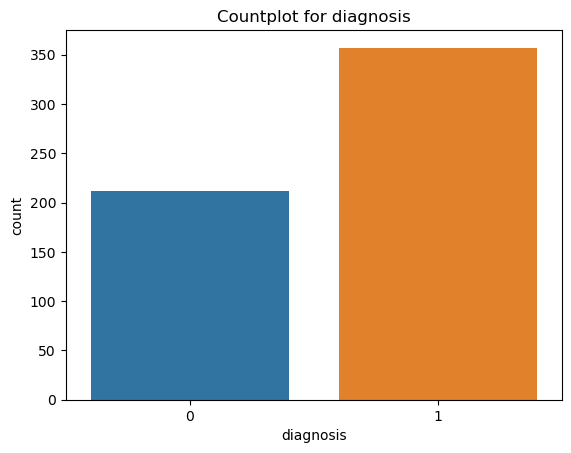

In [20]:
#To display countplot of target variable
sns.countplot(x=df['diagnosis'])
plt.title('Countplot for diagnosis')
plt.show()

In [21]:
#To display basic statistical values for numeric columns
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
# Univariate analysis

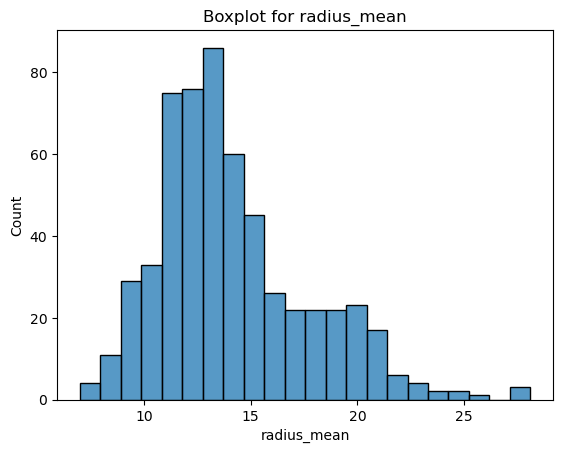

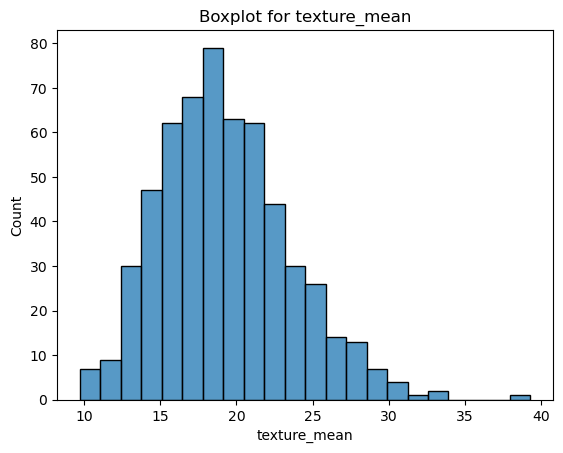

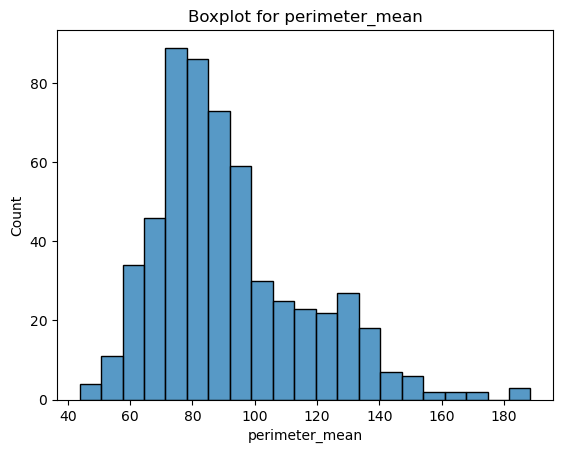

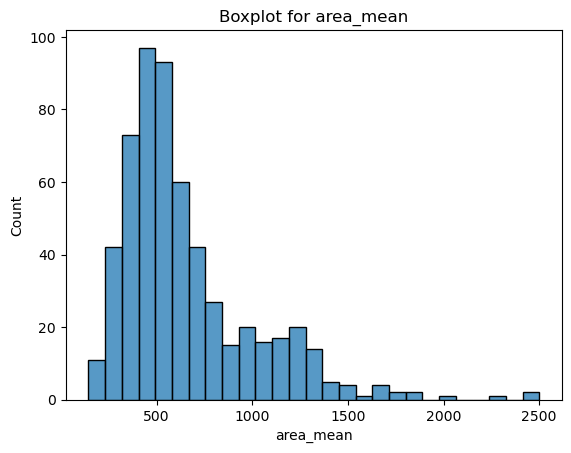

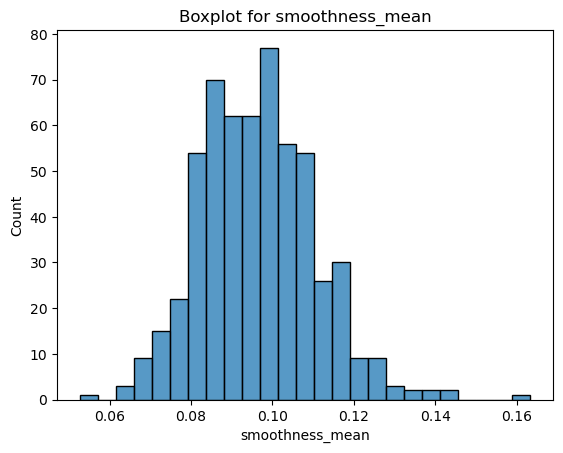

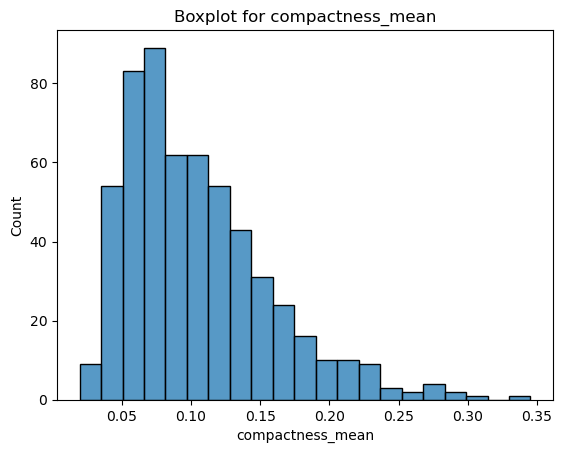

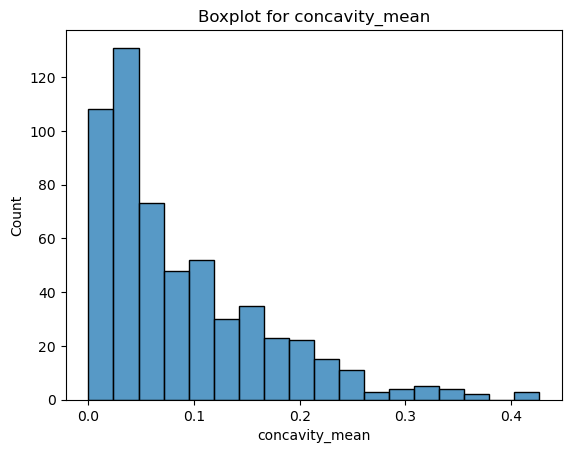

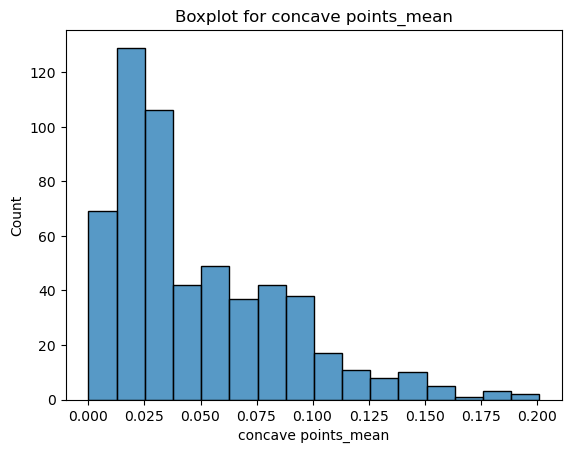

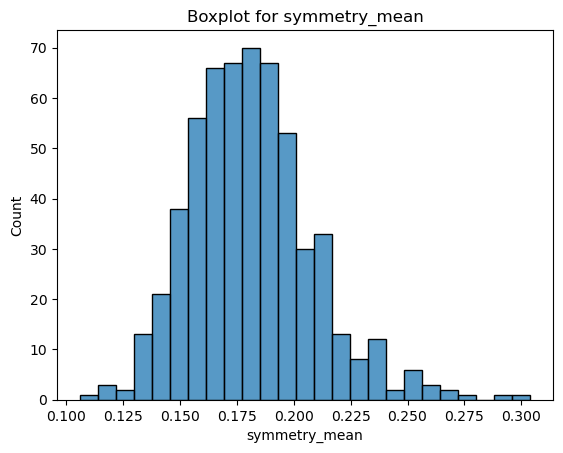

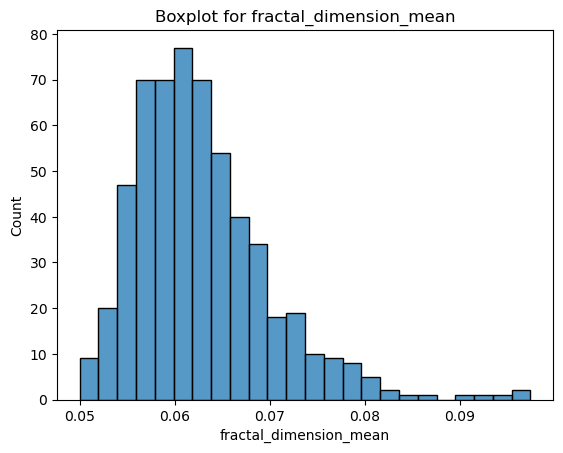

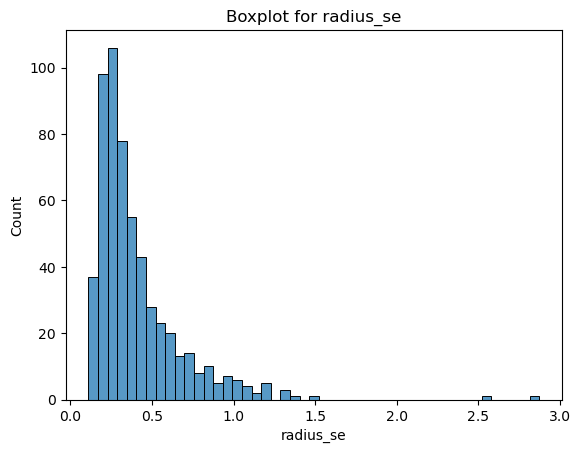

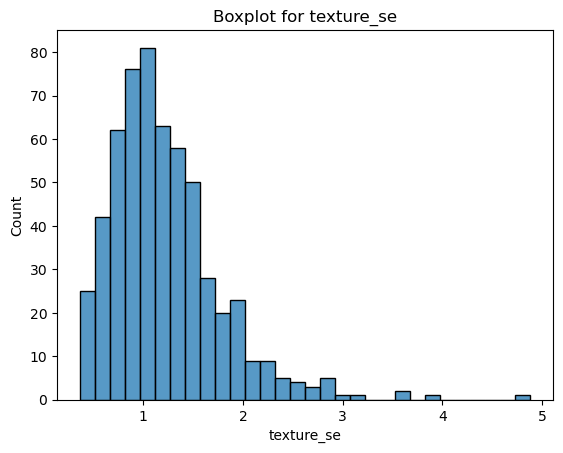

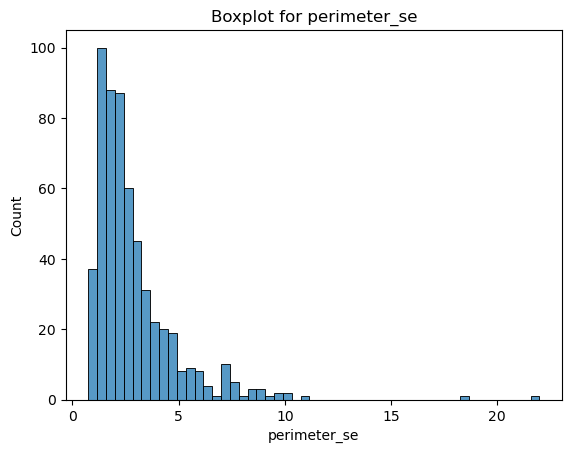

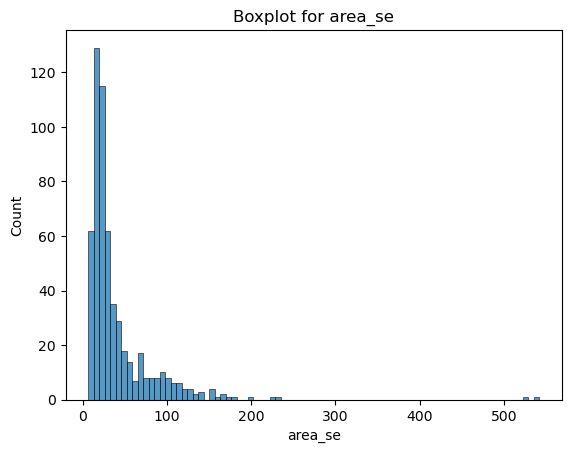

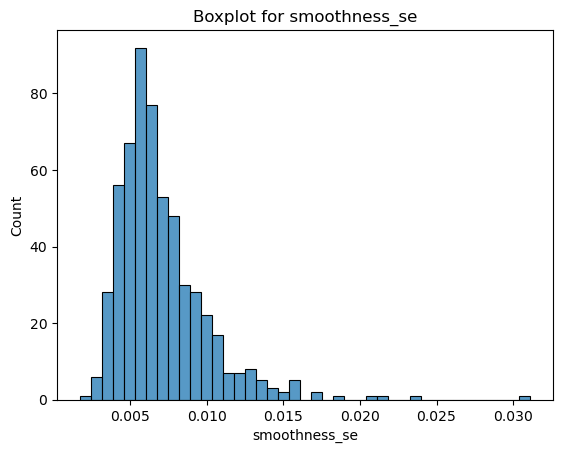

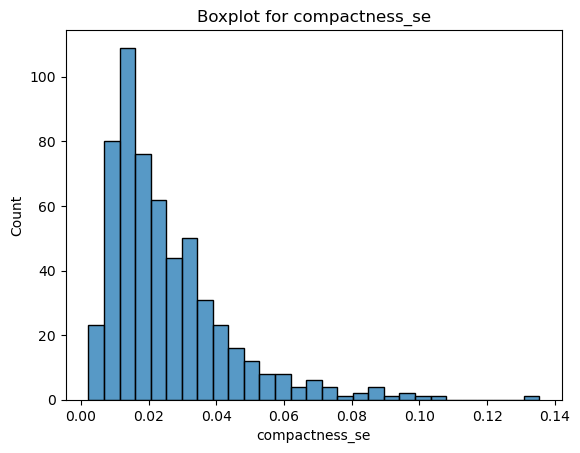

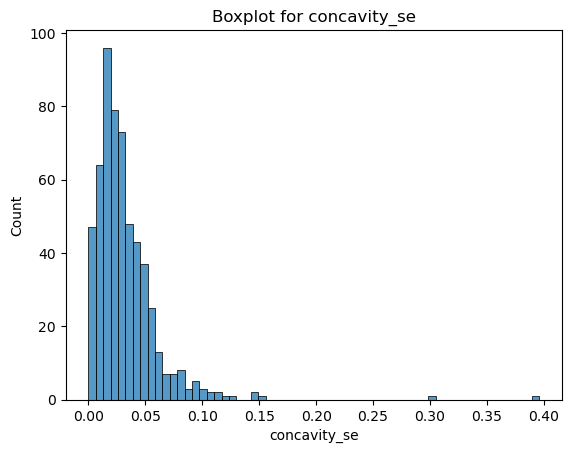

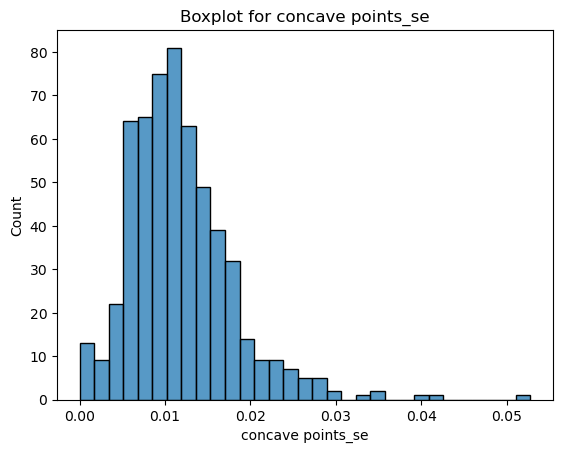

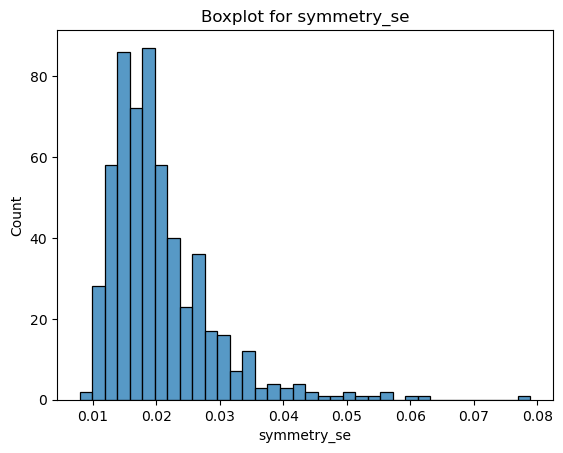

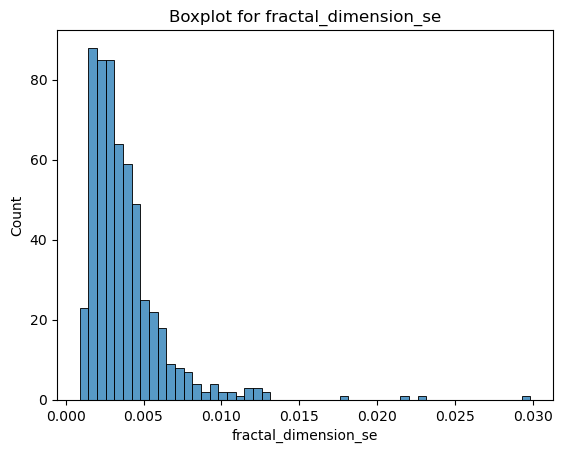

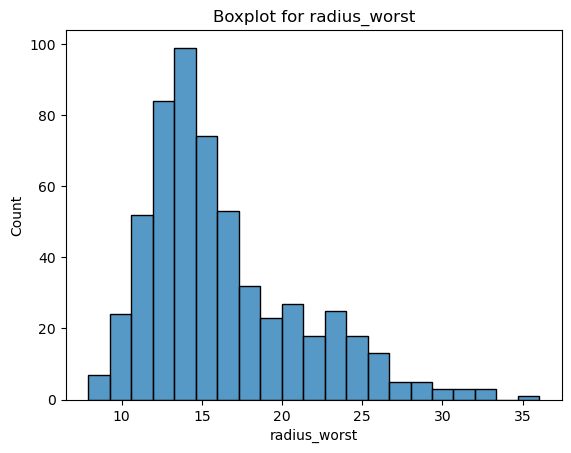

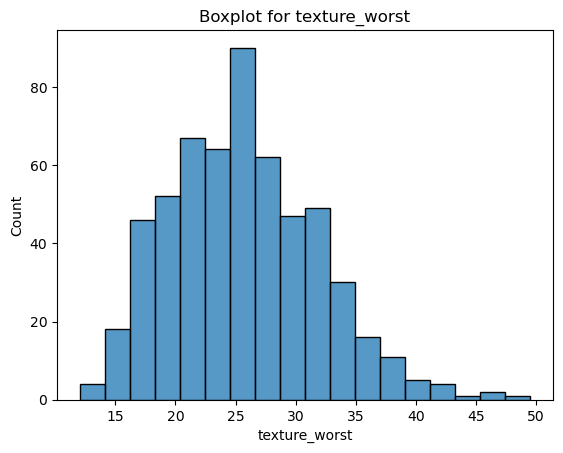

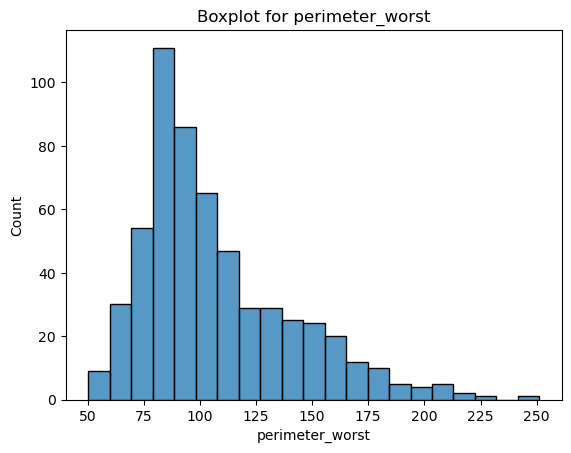

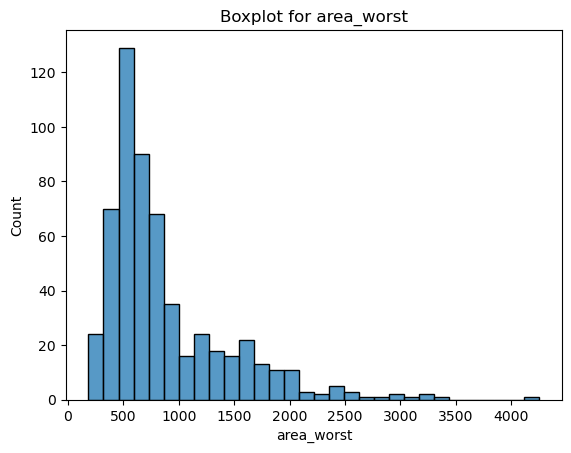

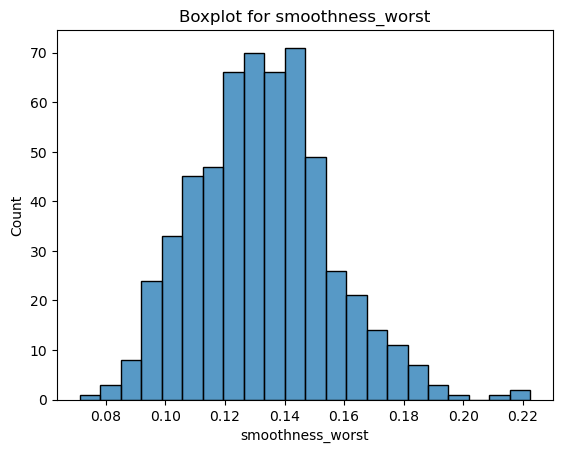

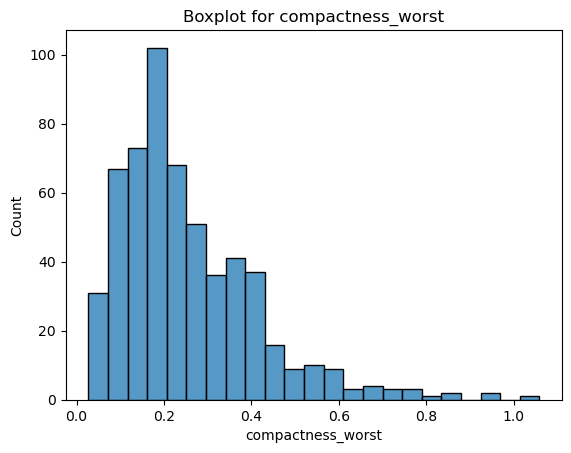

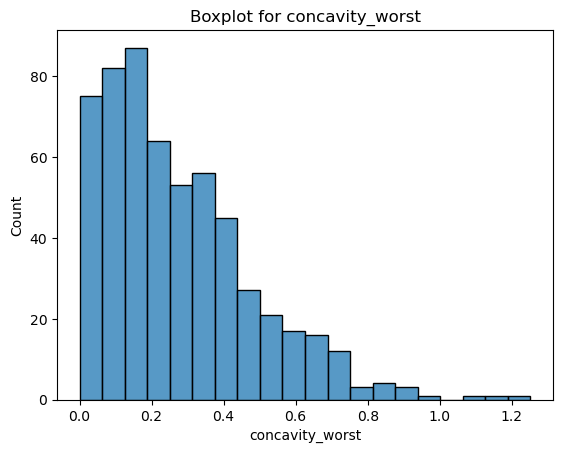

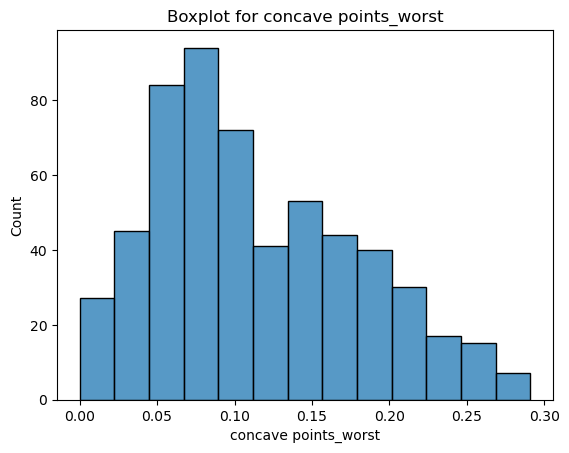

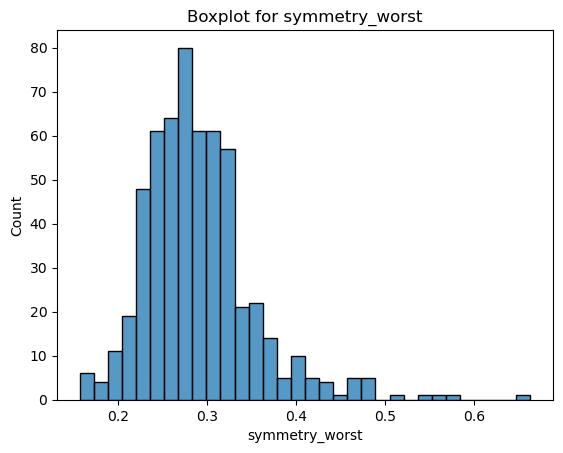

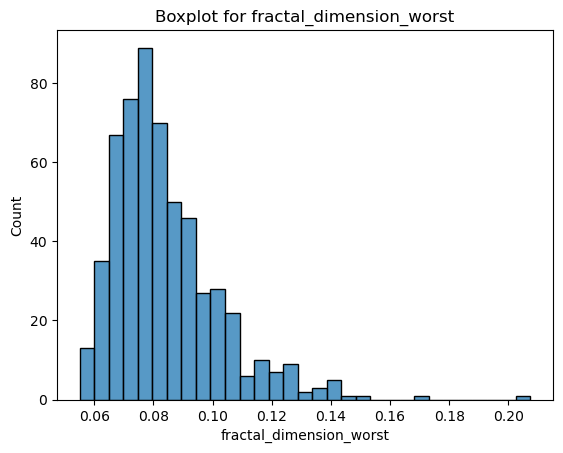

In [23]:
#To display histogram for all numeric columns
for i in num_cols:
    sns.histplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

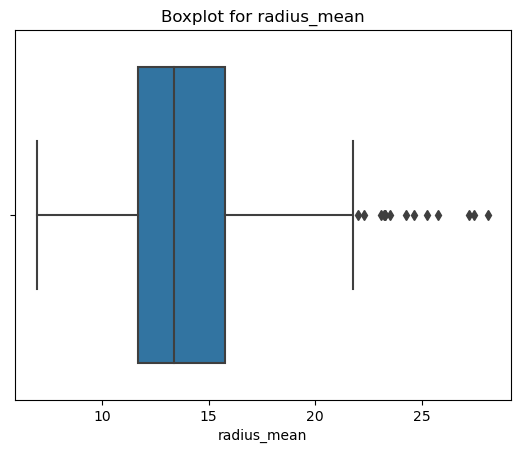

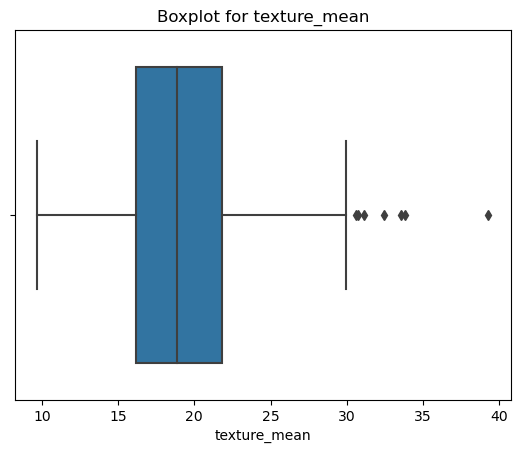

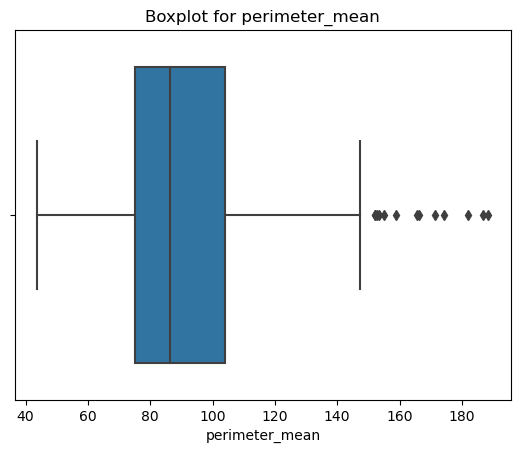

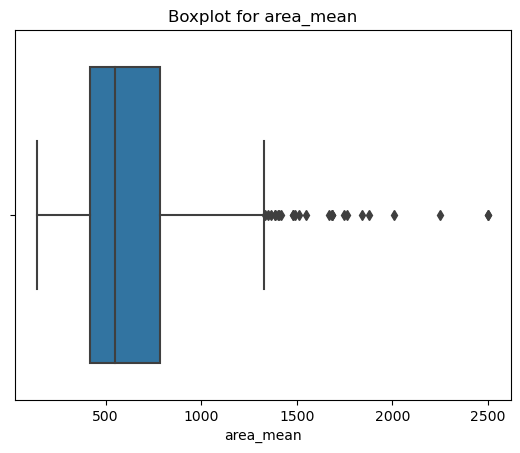

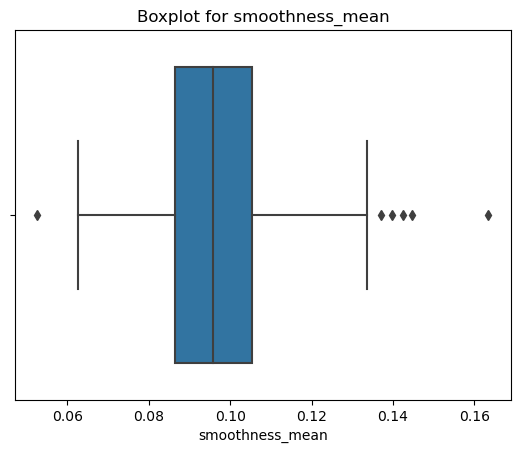

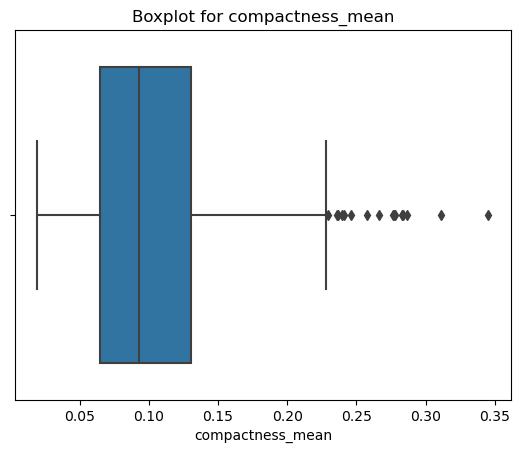

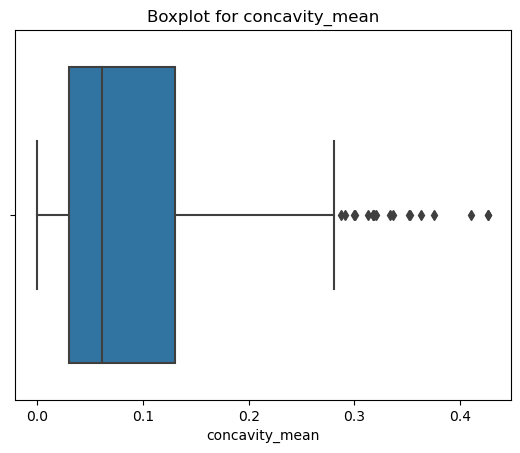

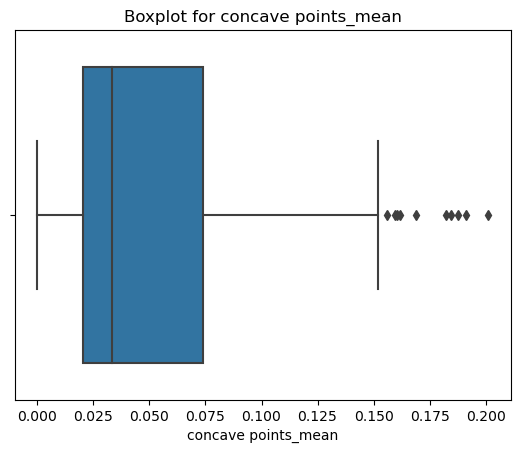

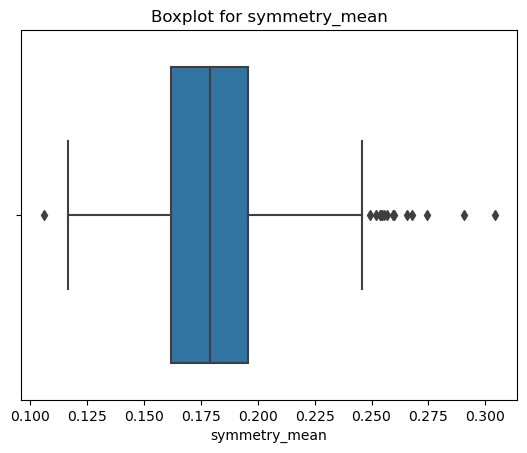

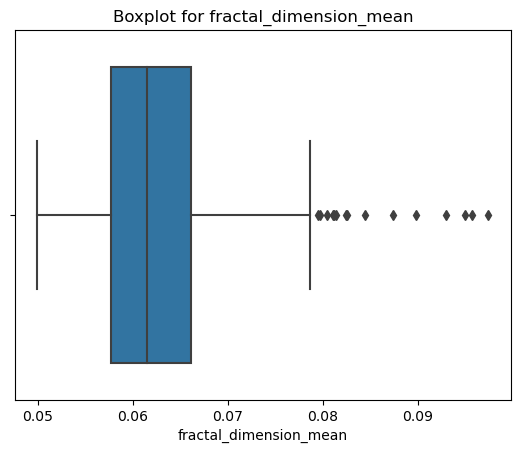

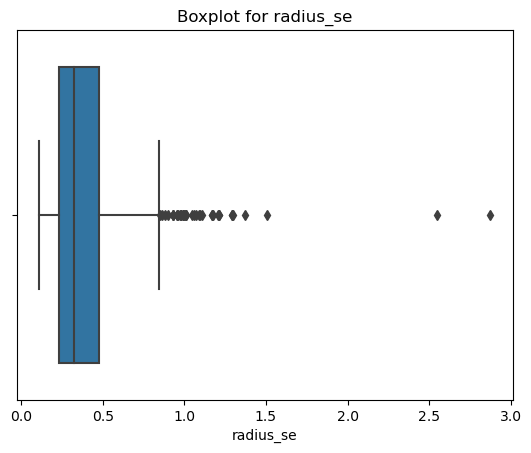

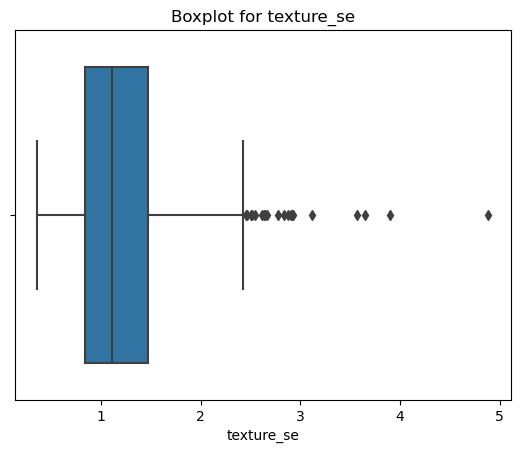

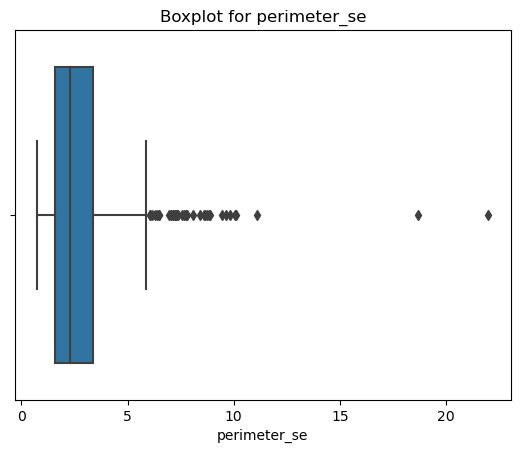

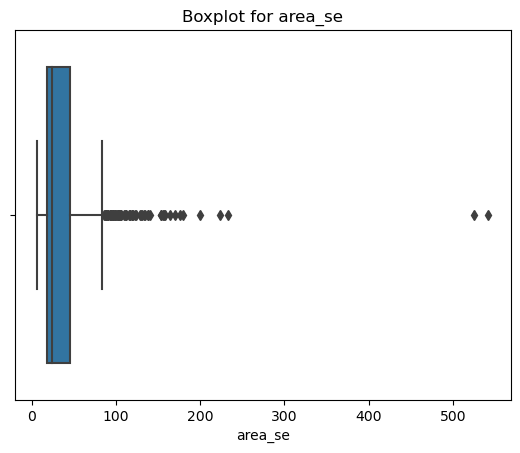

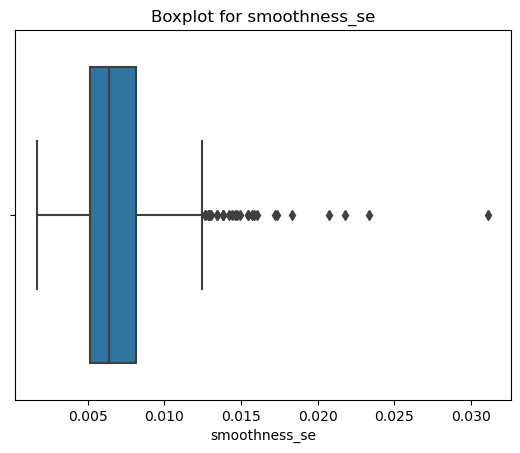

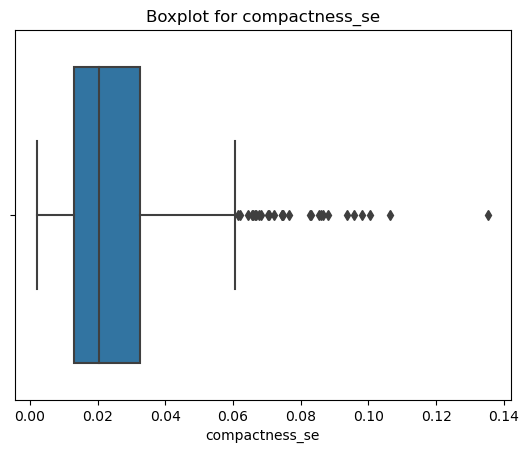

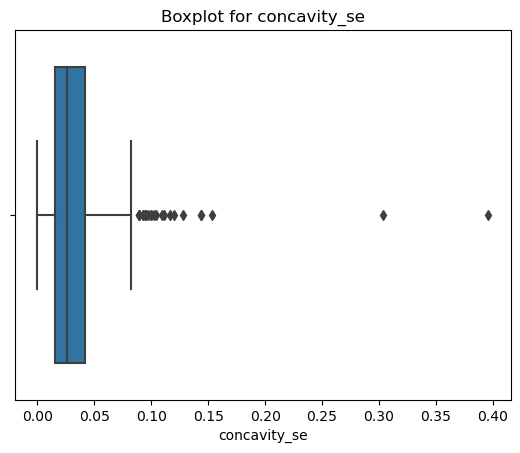

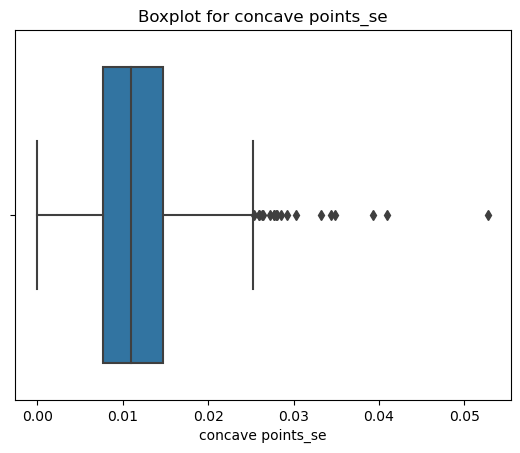

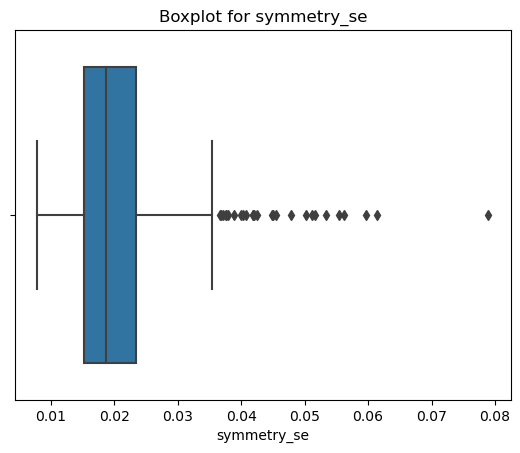

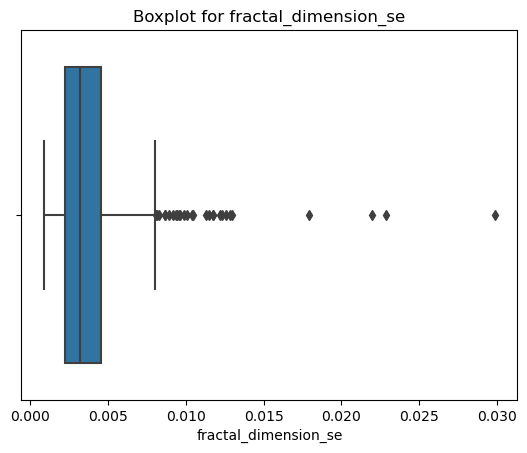

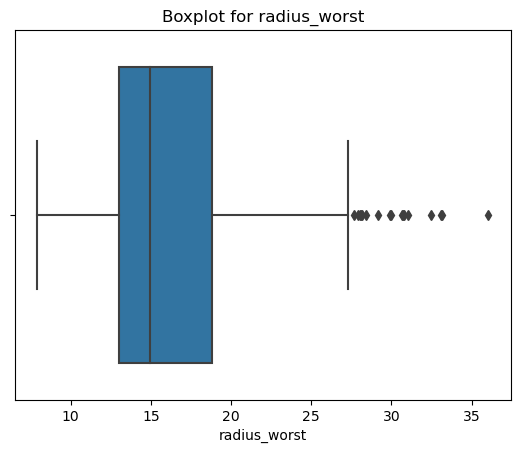

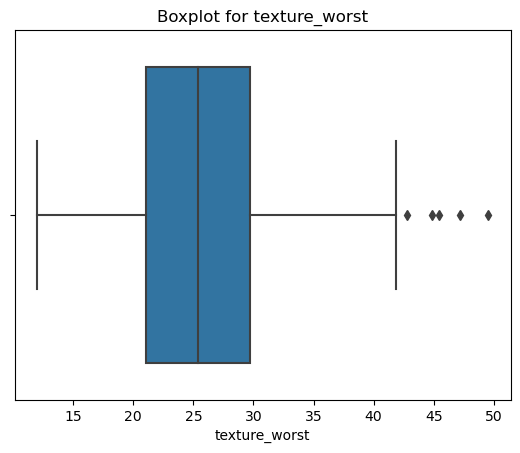

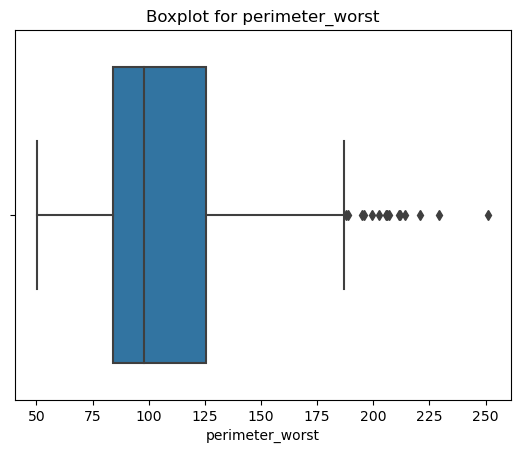

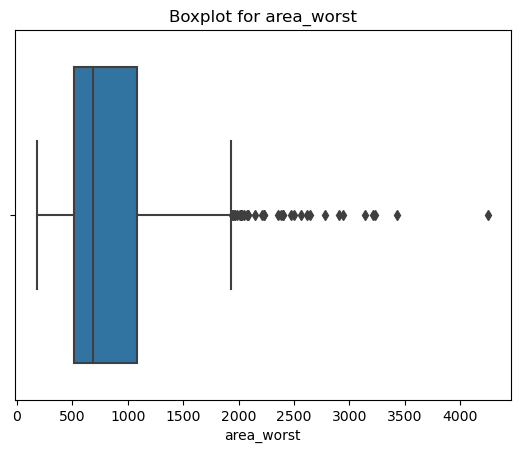

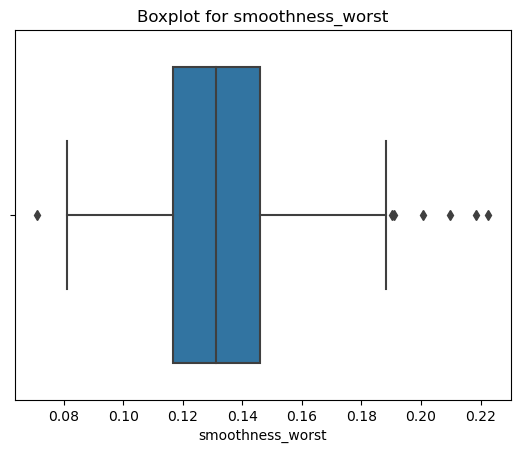

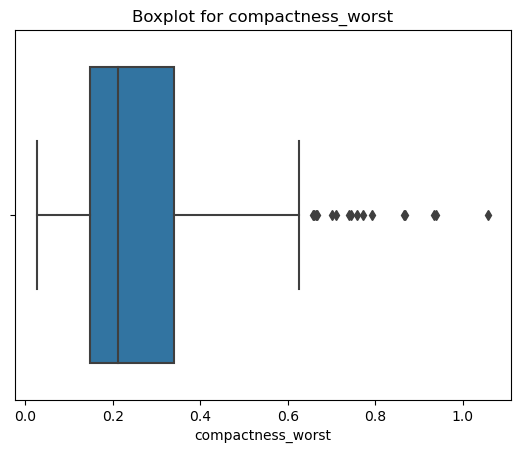

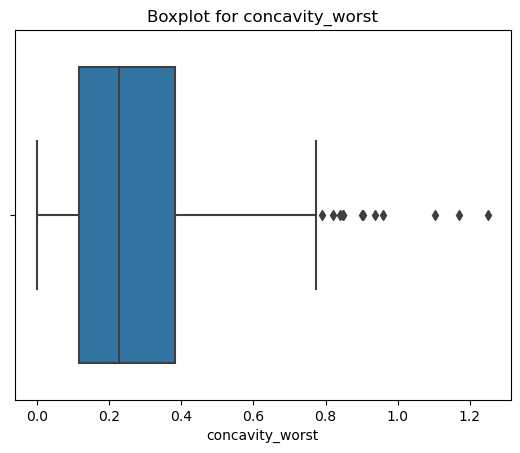

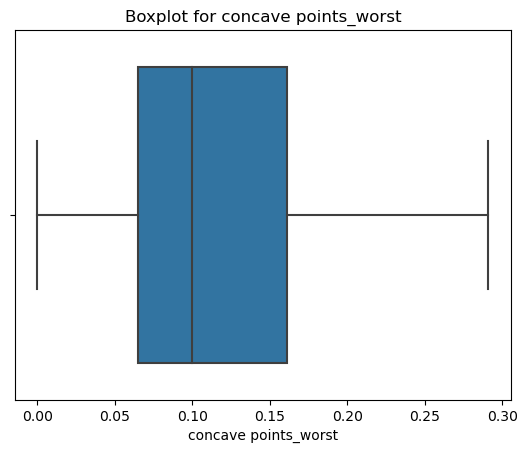

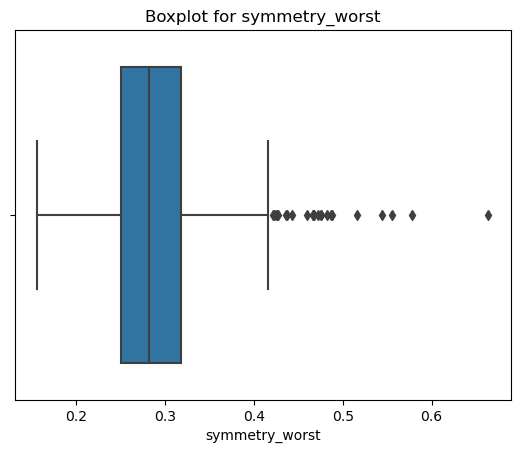

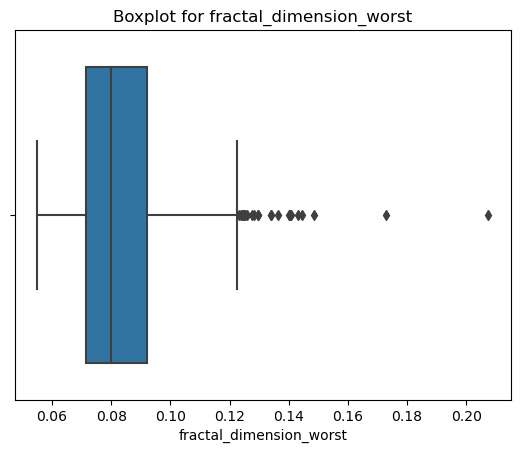

In [24]:
#To display box plot for all numeric columns
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

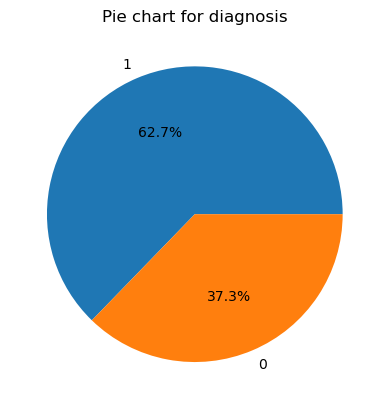

In [25]:
#To display pie chart for all categorical columns
for i in cat_cols:
    count = df[i].value_counts()
    labels = count.index.tolist()
    sizes = count.values.tolist()
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Pie chart for {i}')
    plt.show()

In [26]:
# Bi-Variate Analysis

In [27]:
#To display pair plot between two numeric columns
# sns.pairplot(df,vars=num_cols)  
# plt.show()

In [28]:
#Multi-variate Analysis

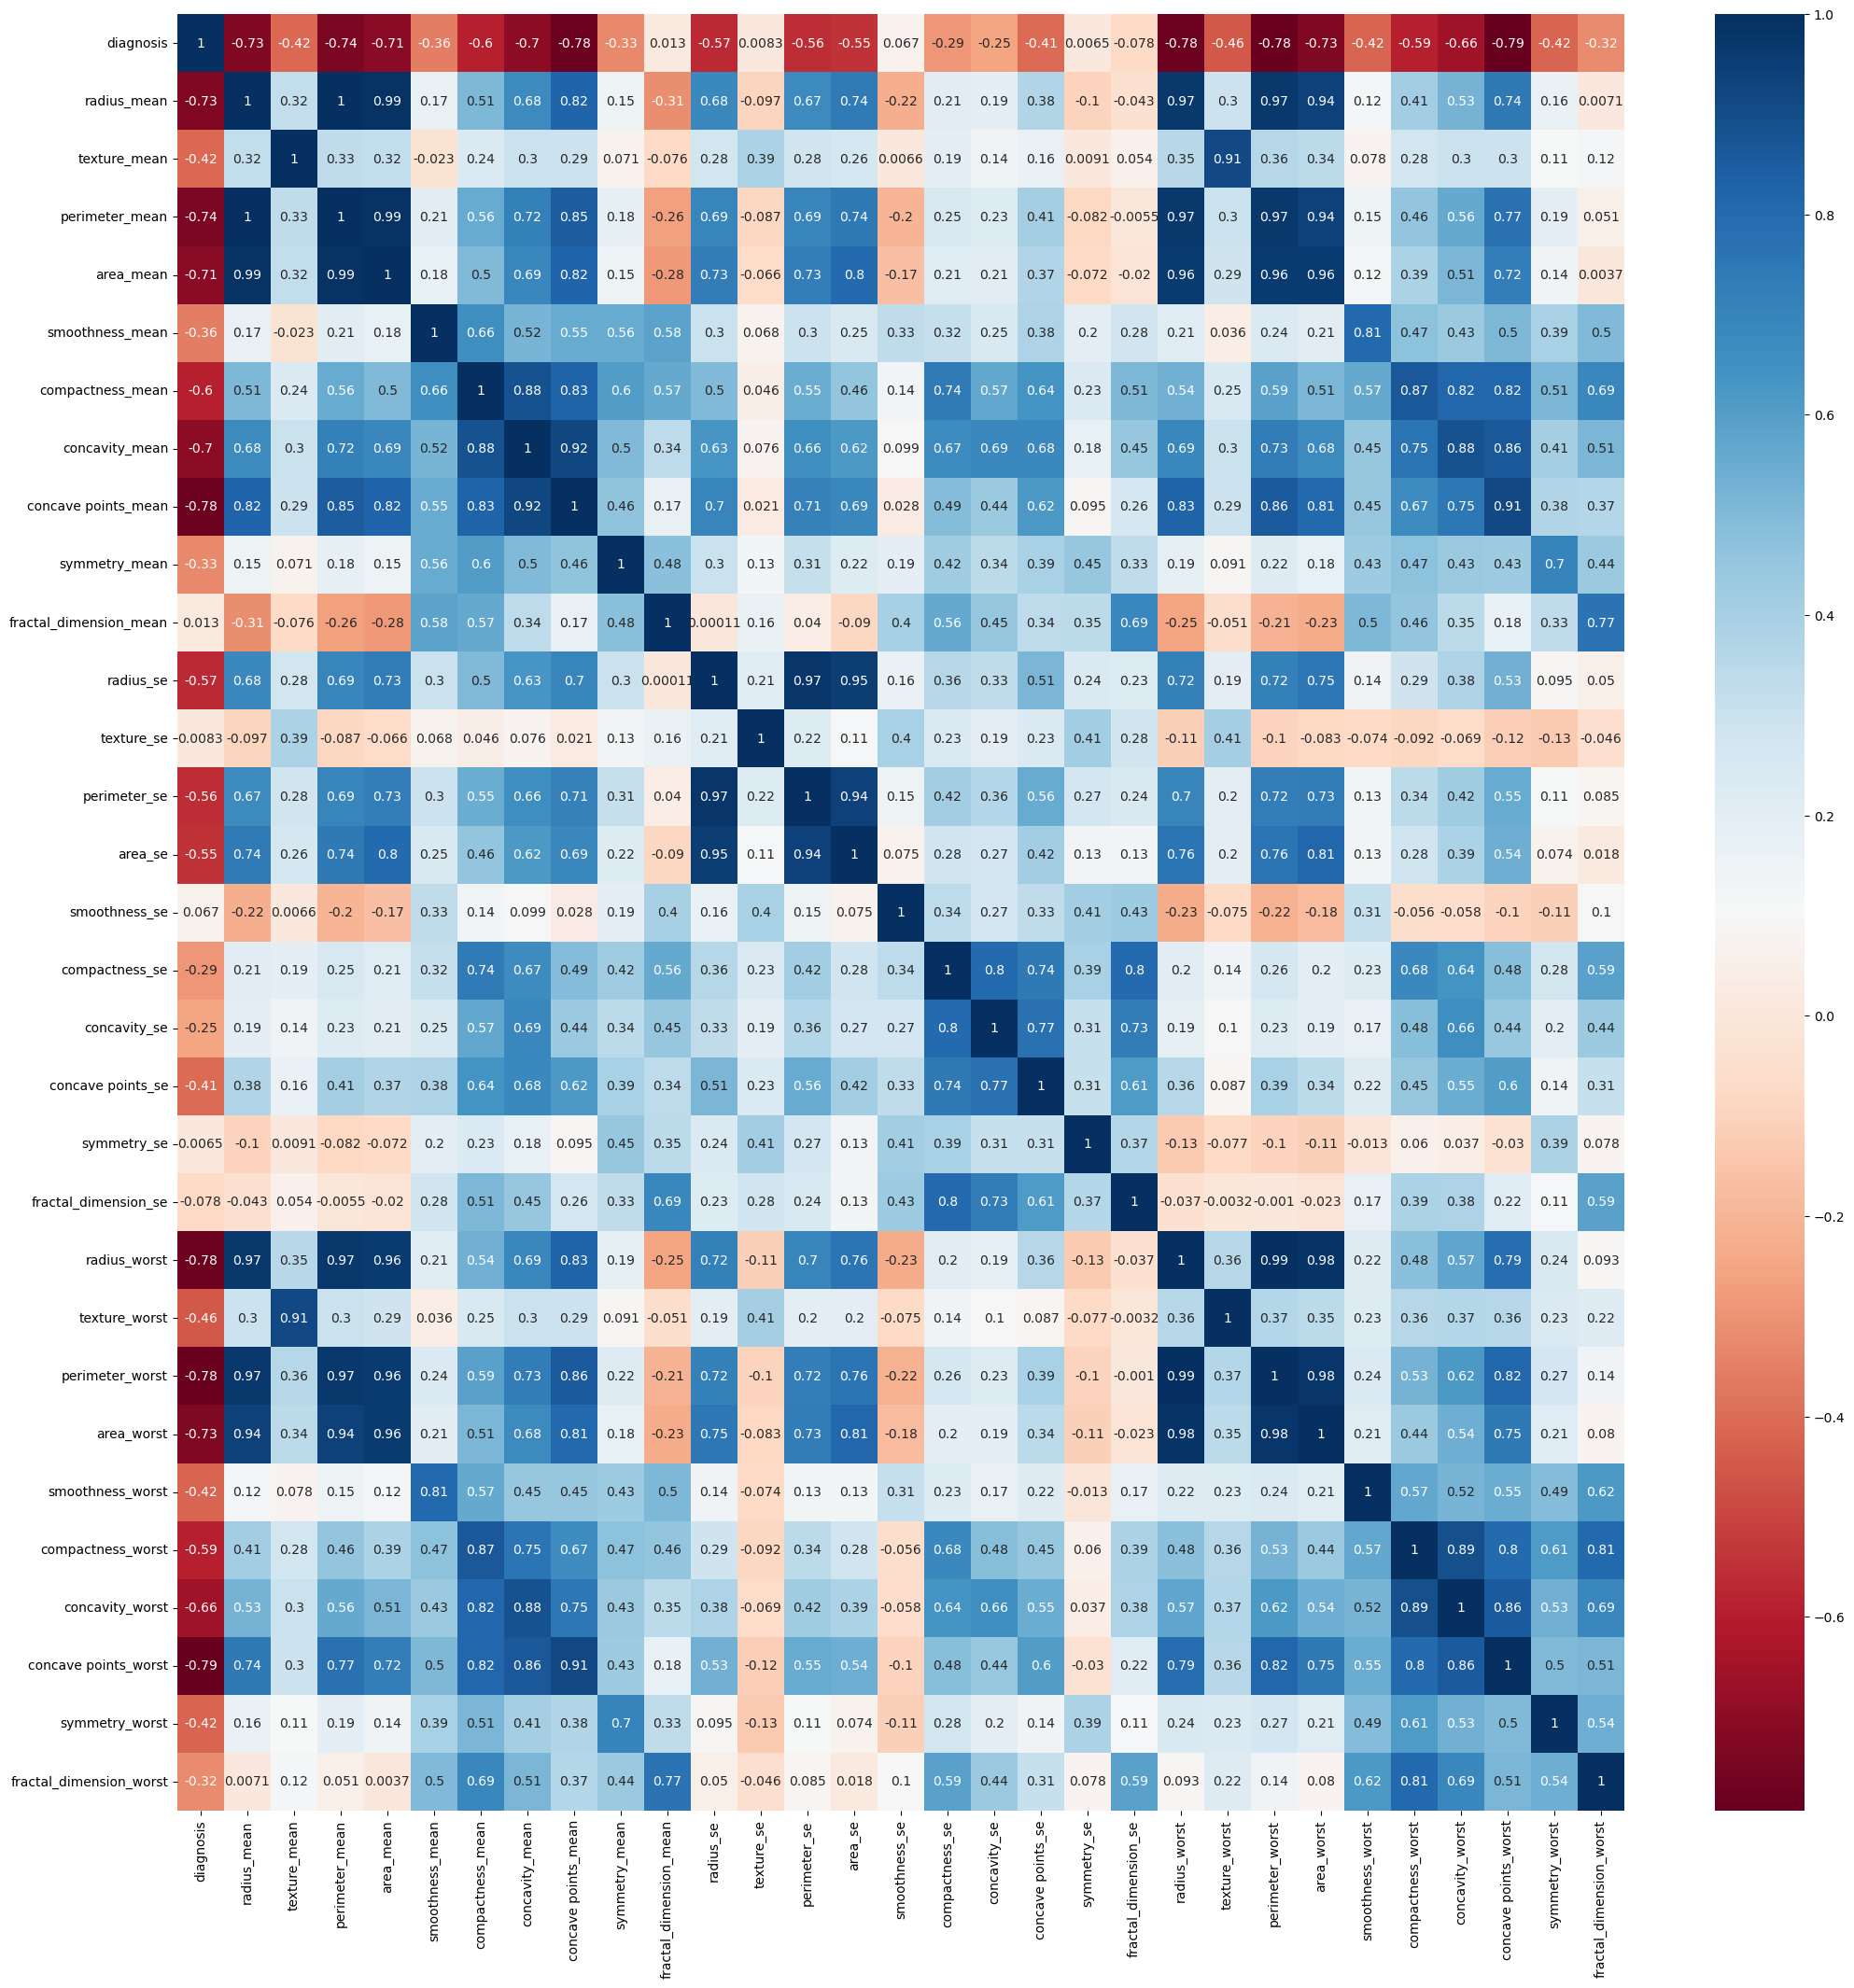

In [29]:
#To display correlation between different columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

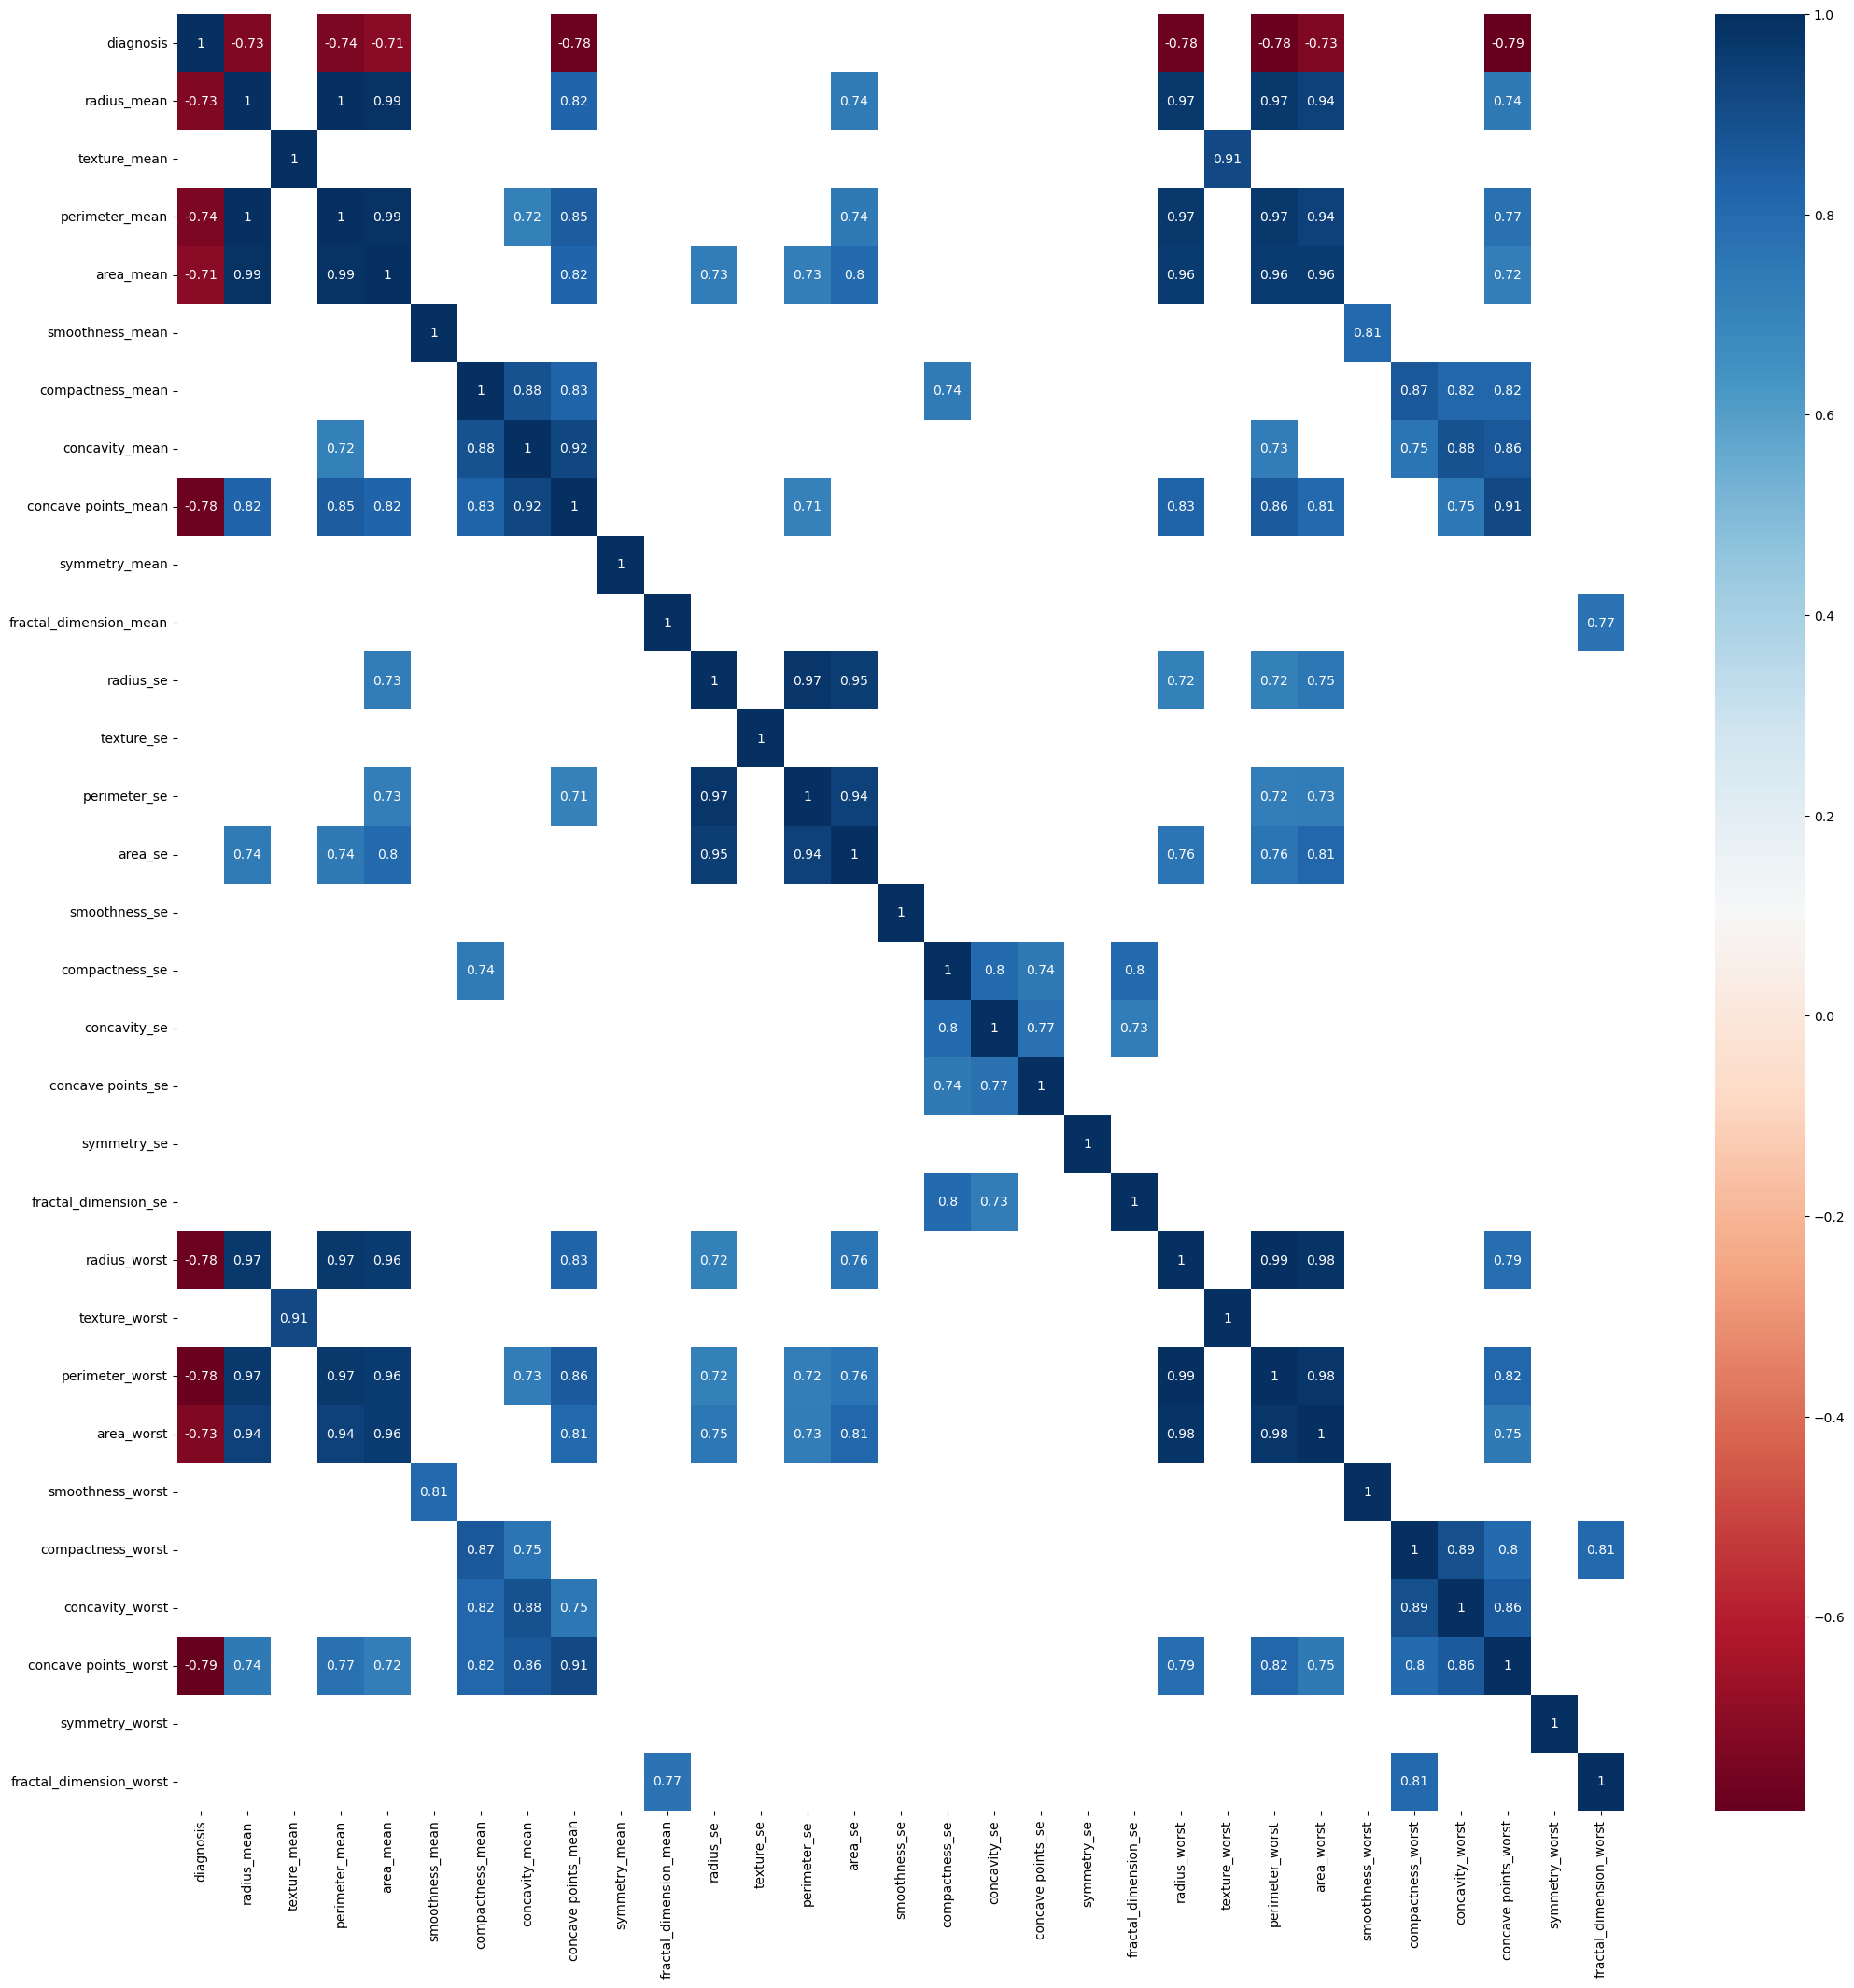

In [30]:
#To display columns that have high correlation
plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>=0.9], annot=True, cmap='RdBu')
plt.show()

In [31]:
# Removing columns with correlation more than 90%

In [32]:
def high_corr_feat(corr,thresh):
    res = []
    for i in range(len(corr.columns)): # i = 0,1,2..,29
        for j in range(i):             # i=0,j=0,  i=1,j=0
            if corr.iloc[i,j] >= thresh:
                res.append(corr.columns[i])
    res = list(set(res))
    return res
    
feat_to_drop = high_corr_feat(corr,0.9)
print(feat_to_drop)

['concave points_worst', 'texture_worst', 'area_se', 'area_worst', 'radius_worst', 'area_mean', 'perimeter_se', 'perimeter_mean', 'perimeter_worst', 'concave points_mean']


In [33]:
df.drop(feat_to_drop,inplace=True,axis=1)

In [34]:
# Outlier Treatment

In [35]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
diagnosis,569.0,0.627417,0.483918,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,8.458360,8.728880,9.029520,9.529200,13.370000,20.576000,21.552400,22.794800,24.371600,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,10.930400,12.188000,12.711200,13.088000,18.840000,27.150000,28.209600,29.315600,30.652000,39.28000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.068654,0.070126,0.073512,0.075042,0.095870,0.118780,0.123696,0.126724,0.132888,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.033351,0.035884,0.037663,0.040660,0.092630,0.208700,0.227452,0.240688,0.277192,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.000000,0.000000,0.001489,0.004983,0.061540,0.243020,0.286856,0.317528,0.351688,0.42680
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.129508,0.134936,0.137308,0.141500,0.179200,0.230720,0.239796,0.253188,0.259564,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.051504,0.052473,0.053072,0.053926,0.061540,0.076090,0.078173,0.080831,0.085438,0.09744
radius_se,569.0,0.405172,0.277313,0.111500,0.119740,0.136488,0.148556,0.160100,0.324200,0.959520,1.057520,1.170200,1.291320,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.410548,0.469576,0.489264,0.540140,1.108000,2.212000,2.506200,2.656440,2.915440,4.88500


In [38]:
def out_treat(x):
    x = x.clip(upper = x.quantile(0.97))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [39]:
num_cols = df.dtypes[df.dtypes!='object'].index
df[num_cols] = df[num_cols].apply(out_treat)

In [40]:
# Model building

In [41]:
# Creating Function to evalute the model performance

In [42]:
def eval_model(model,x_train,x_test,y_train,y_test):
    global train_score, test_score, precision, recall, acc, kappa, f1

    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')

    print('Accuracy_Score is', round(acc,4))
    print('precision Score is:', round(precision,4))
    print('Recall Score is:', round(recall,4))
    print('kappa Score is:', round(kappa,4))
    print('F1 Score is:', round(f1,4))

    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    print(classification_report(y_test,y_pred))

    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    plt.show()

In [43]:
def plot_roc_auc(model,y_test,ypred_proba):
    global auc
    fpr,tpr,thresh = roc_curve(y_test,ypred_proba[:,1])
    auc = roc_auc_score(y_test,ypred_proba[:,1])
    print('AUC:',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

In [44]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'AUC Score' , 'Precision Score', 
                                   'Recall Score', 'Accuracy Score', 
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score, 
                                    'Test Score': test_score,
                                     'AUC Score' : auc,
                                    'Precision Score': precision, 
                                    'Recall Score': recall, 'Accuracy Score': acc, 
                                    'Kappa Score': kappa, 'f1-score': f1}, ignore_index = True)
    return(score_card)

In [45]:
#Select the Dependent and Independent Features
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(569, 20) (569,)


In [46]:
#Split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 20)
(171, 20)
(398,)
(171,)


In [47]:
# Logistic Regression


Training Score is: 93.72 %
Testing Score is: 92.4 %

Accuracy_Score is 0.924
precision Score is: 0.9505
Recall Score is: 0.9231
kappa Score is: 0.8417
F1 Score is: 0.9366

Confusion Matrix is
 [[62  5]
 [ 8 96]]

Predictions:
 [0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        67
           1       0.95      0.92      0.94       104

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



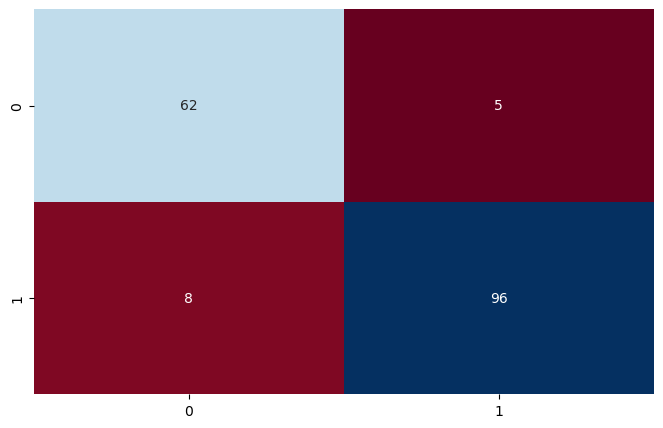

In [48]:
lr = LogisticRegression(max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

In [49]:
### ROC_AUC Curve

AUC: 0.9822043628013778


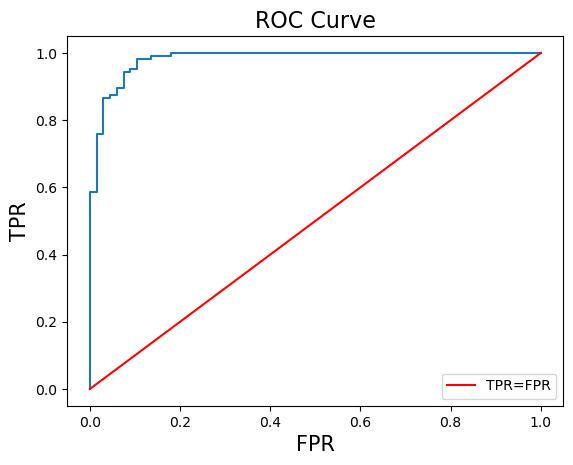

In [50]:
ypred_proba_lr = lr.predict_proba(x_test)
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_proba_lr)

In [51]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(best_thresh_idx)
print(thresh_lr1[best_thresh_idx])

16
0.2639111768429605


In [52]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585


In [53]:
#### Logistic Regression (using SGD)


Training Score is: 88.69 %
Testing Score is: 83.63000000000001 %

Accuracy_Score is 0.8363
precision Score is: 0.9872
Recall Score is: 0.7404
kappa Score is: 0.6786
F1 Score is: 0.8462

Confusion Matrix is
 [[66  1]
 [27 77]]

Predictions:
 [0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.71      0.99      0.83        67
           1       0.99      0.74      0.85       104

    accuracy                           0.84       171
   macro avg       0.85      0.86      0.84       171
weighted avg       0.88      0.84      0.84       171



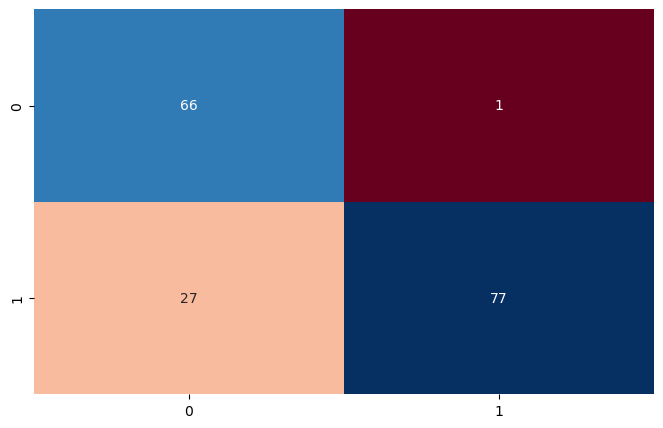

In [54]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

AUC: 0.9822043628013778


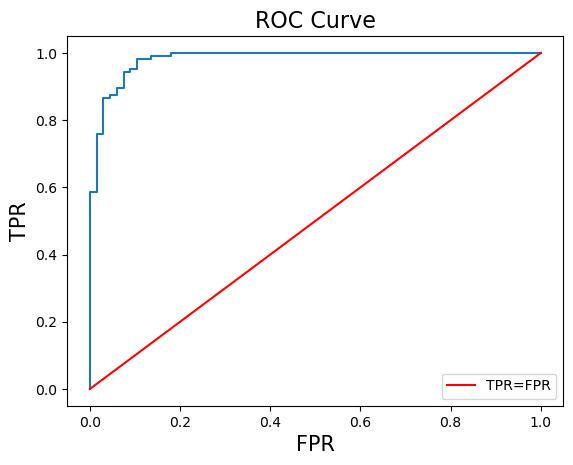

In [55]:
ypred_proba_lr_SGD = lr.predict_proba(x_test)
fpr_lr2,tpr_lr2,thresh_lr2 = plot_roc_auc(lr_SGD,y_test,ypred_proba_lr_SGD)

In [56]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154


In [57]:
# Decision Tree Classifier


Training Score is: 100.0 %
Testing Score is: 90.64 %

Accuracy_Score is 0.9064
precision Score is: 0.9681
Recall Score is: 0.875
kappa Score is: 0.8088
F1 Score is: 0.9192

Confusion Matrix is
 [[64  3]
 [13 91]]

Predictions:
 [0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        67
           1       0.97      0.88      0.92       104

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.90       171
weighted avg       0.91      0.91      0.91       171



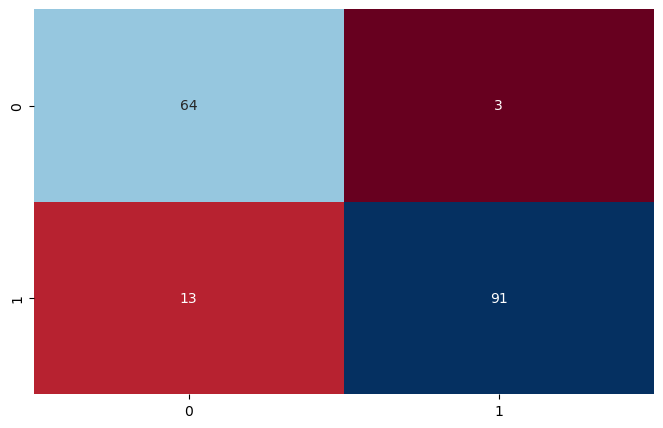

In [58]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)

In [59]:
ypred_proba_dt1 = dt1.predict_proba(x_test)

AUC: 0.9151119402985075


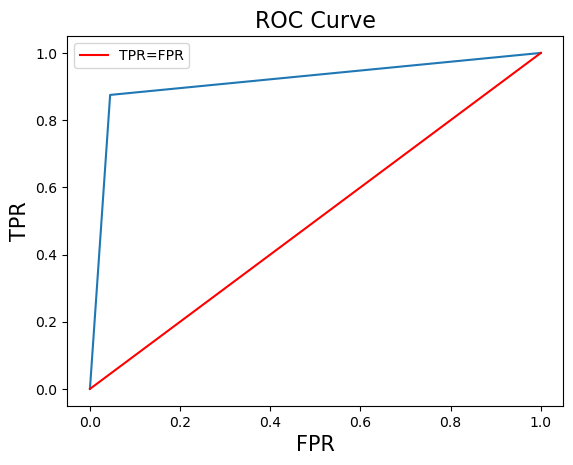

In [60]:
fpr_dt1,tpr_dt1,thresh_dt1 = plot_roc_auc(dt1,y_test,ypred_proba_dt1)

In [61]:
update_score_card(model_name = 'Decision Tree Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192


In [62]:
# Decision Tree with Pruning

In [63]:
tuned_paramaters = [ {'criterion':['gini','entropy'],'max_depth':[8,9,10,11,12,14],
'min_samples_split':[8,10,12,14,15,16,20]}]

dt_CV= DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8} 




Training Score is: 99.25 %
Testing Score is: 90.06 %

Accuracy_Score is 0.9006
precision Score is: 0.9485
Recall Score is: 0.8846
kappa Score is: 0.7952
F1 Score is: 0.9154

Confusion Matrix is
 [[62  5]
 [12 92]]

Predictions:
 [0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        67
           1       0.95      0.88      0.92       104

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.90       171
weighted avg       0.91      0.90      0.90       171



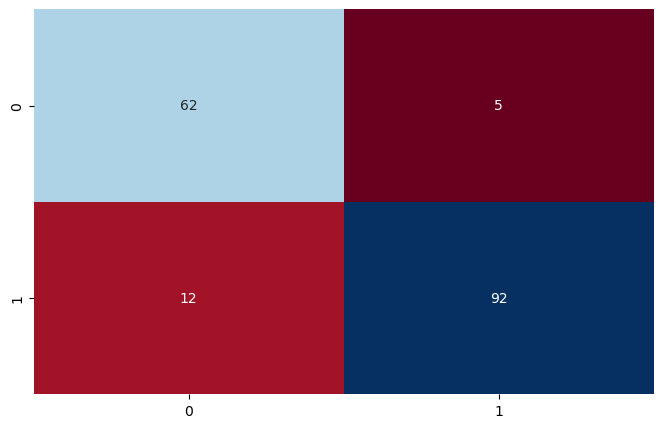

In [66]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=8, min_samples_split=8) # Enter values from best_params
eval_model(dt2,x_train,x_test,y_train,y_test)

In [67]:
ypred_proba_dt2 = dt2.predict_proba(x_test)

AUC: 0.9101607347876004


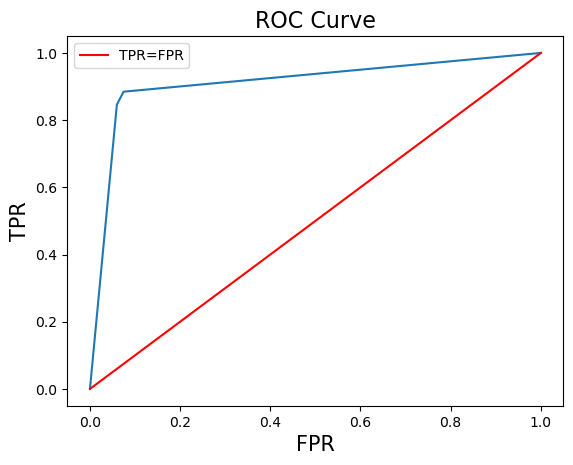

In [68]:
fpr_dt2,tpr_dt2,thresh_dt2 = plot_roc_auc(dt2,y_test,ypred_proba_dt2)

In [69]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423


In [70]:
# Ensemble Learning

In [71]:
# Bagging Classifier


Training Score is: 99.25 %
Testing Score is: 92.97999999999999 %

Accuracy_Score is 0.9298
precision Score is: 0.9792
Recall Score is: 0.9038
kappa Score is: 0.8558
F1 Score is: 0.94

Confusion Matrix is
 [[65  2]
 [10 94]]

Predictions:
 [0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        67
           1       0.98      0.90      0.94       104

    accuracy                           0.93       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.93      0.93       171



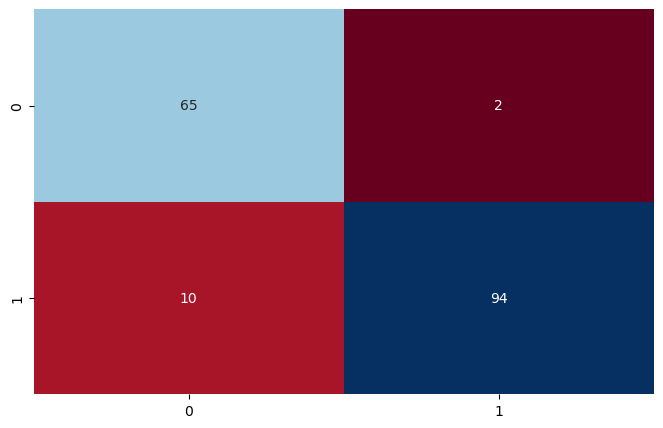

In [72]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

In [73]:
ypred_proba_bag = bag.predict_proba(x_test)

AUC: 0.9723019517795637


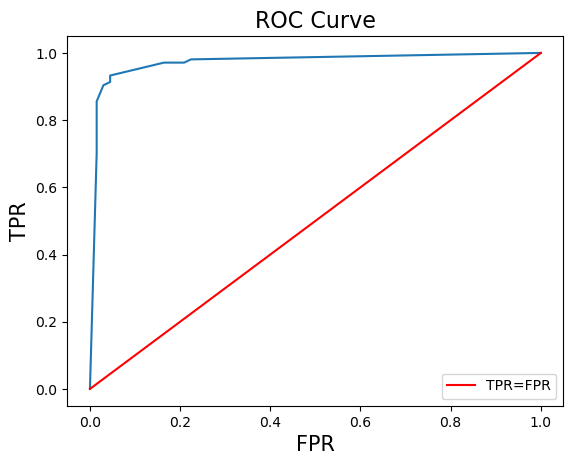

In [74]:
fpr_bag,tpr_bag,thresh_bag = plot_roc_auc(bag,y_test,ypred_proba_bag)

In [75]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000


In [76]:
# AdaBoost Classifier


Training Score is: 100.0 %
Testing Score is: 90.64 %

Accuracy_Score is 0.9064
precision Score is: 0.9681
Recall Score is: 0.875
kappa Score is: 0.8088
F1 Score is: 0.9192

Confusion Matrix is
 [[64  3]
 [13 91]]

Predictions:
 [0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        67
           1       0.97      0.88      0.92       104

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.90       171
weighted avg       0.91      0.91      0.91       171



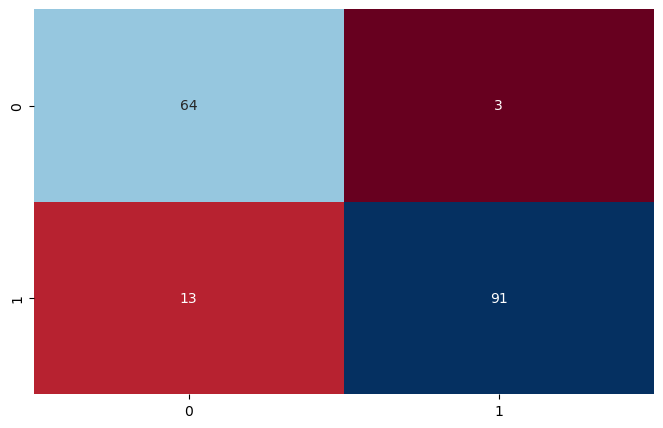

In [77]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

In [78]:
ypred_proba_adaboost = adaboost.predict_proba(x_test)

AUC: 0.9151119402985075


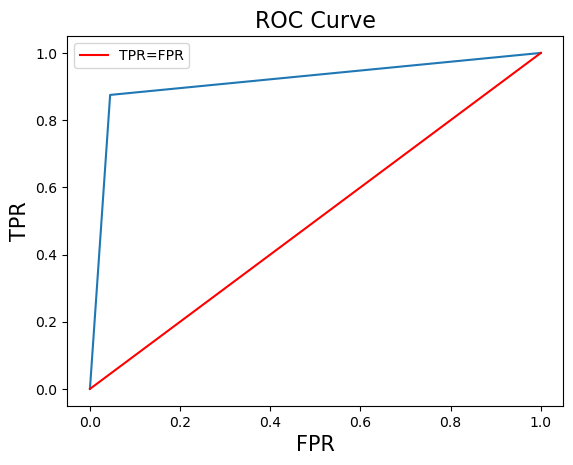

In [79]:
fpr_adaboost,tpr_adaboost,thresh_adaboost = plot_roc_auc(adaboost,y_test,ypred_proba_adaboost)

In [80]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192


In [81]:
# XGBoost Classifier


Training Score is: 98.74000000000001 %
Testing Score is: 91.81 %

Accuracy_Score is 0.9181
precision Score is: 0.9688
Recall Score is: 0.8942
kappa Score is: 0.8318
F1 Score is: 0.93

Confusion Matrix is
 [[64  3]
 [11 93]]

Predictions:
 [0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        67
           1       0.97      0.89      0.93       104

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



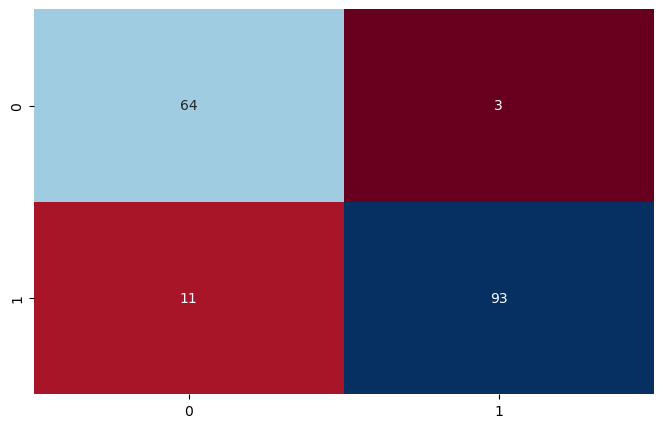

In [82]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

In [83]:
ypred_proba_xgbm = xgbm.predict_proba(x_test)

AUC: 0.9628300803673937


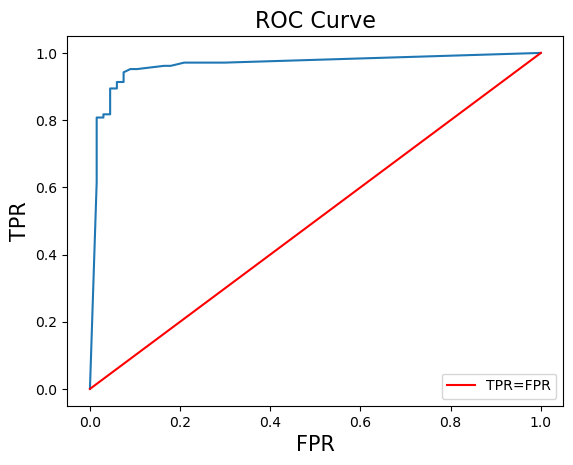

In [84]:
fpr_xgbm,tpr_xgbm,thresh_xgbm = plot_roc_auc(xgbm,y_test,ypred_proba_xgbm)

In [85]:
update_score_card(model_name = 'XG Boost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000


In [86]:
# Random Forest Classifier


Training Score is: 100.0 %
Testing Score is: 93.57 %

Accuracy_Score is 0.9357
precision Score is: 0.9697
Recall Score is: 0.9231
kappa Score is: 0.8668
F1 Score is: 0.9458

Confusion Matrix is
 [[64  3]
 [ 8 96]]

Predictions:
 [0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        67
           1       0.97      0.92      0.95       104

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



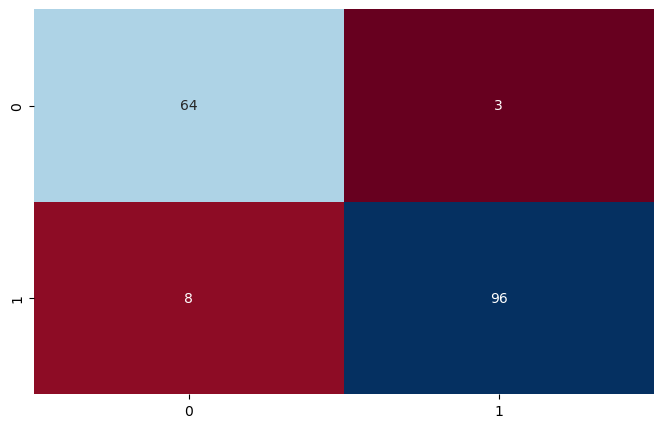

In [87]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf,x_train,x_test,y_train,y_test)

In [88]:
ypred_proba_rf = rf.predict_proba(x_test)

AUC: 0.9845005740528129


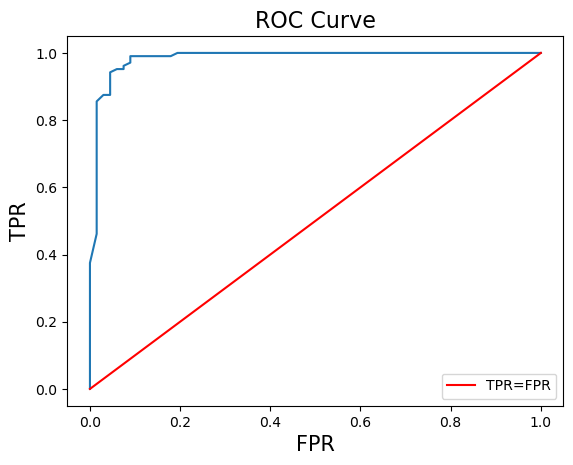

In [89]:
fpr_rf,tpr_rf,thresh_rf = plot_roc_auc(rf,y_test,ypred_proba_rf)

In [90]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813


In [91]:
# Random Forest with GridSearchCV

In [92]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20], 
                     'max_depth': [8, 10], 
                     'min_samples_leaf': [5,10], 
                     'max_leaf_nodes': [10, 15] }]

rf_CV= RandomForestClassifier(random_state = 10)

grid = GridSearchCV(estimator = rf_CV, param_grid = tuned_paramaters, cv = 10)

rf_grid = grid.fit(x_train, y_train)

print('Best parameters for random forest Classifier: ', rf_grid.best_params_, '\n')

Best parameters for random forest Classifier:  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 85} 




Training Score is: 98.24000000000001 %
Testing Score is: 94.74000000000001 %

Accuracy_Score is 0.9474
precision Score is: 0.9703
Recall Score is: 0.9423
kappa Score is: 0.8904
F1 Score is: 0.9561

Confusion Matrix is
 [[64  3]
 [ 6 98]]

Predictions:
 [0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.97      0.94      0.96       104

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



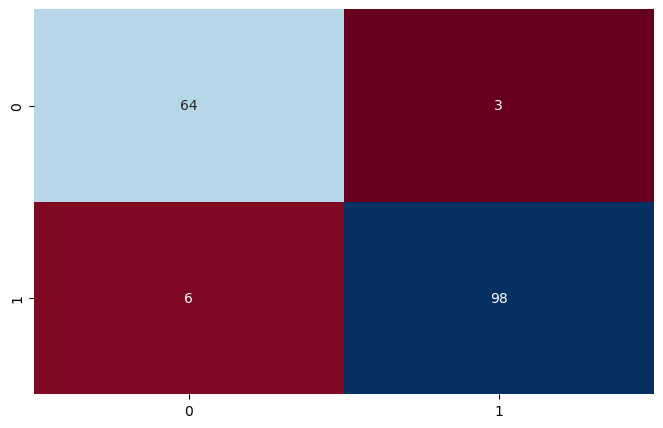

In [93]:
rf2 = RandomForestClassifier(max_depth=8, 
                            max_leaf_nodes=10, 
                            min_samples_leaf=5,
                            min_samples_split=15,
                            n_estimators=100)
eval_model(rf2,x_train,x_test,y_train,y_test)

In [94]:
ypred_proba_rf2 = rf2.predict_proba(x_test)

AUC: 0.9872273249138921


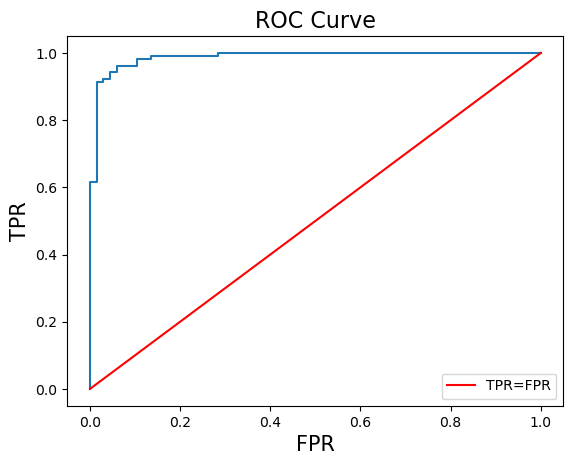

In [95]:
fpr_rf2,tpr_rf2,thresh_rf2 = plot_roc_auc(rf2,y_test,ypred_proba_rf2)


In [96]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098


In [97]:
# Naive Bayes Classifier


Training Score is: 90.2 %
Testing Score is: 92.97999999999999 %

Accuracy_Score is 0.9298
precision Score is: 0.9423
Recall Score is: 0.9423
kappa Score is: 0.8528
F1 Score is: 0.9423

Confusion Matrix is
 [[61  6]
 [ 6 98]]

Predictions:
 [0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        67
           1       0.94      0.94      0.94       104

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



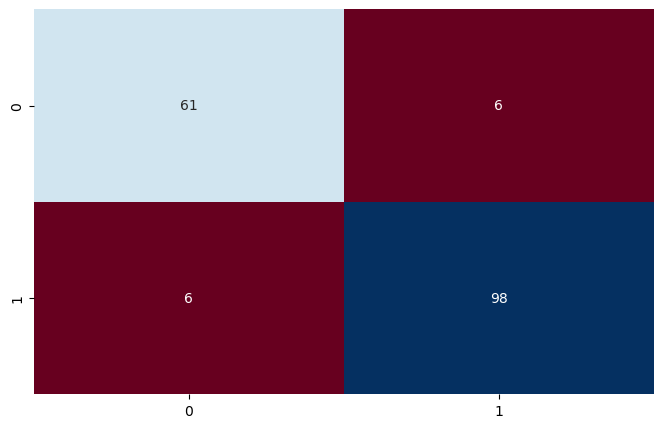

In [98]:
gnb = GaussianNB()
eval_model(gnb,x_train,x_test,y_train,y_test)

AUC: 0.9723019517795637


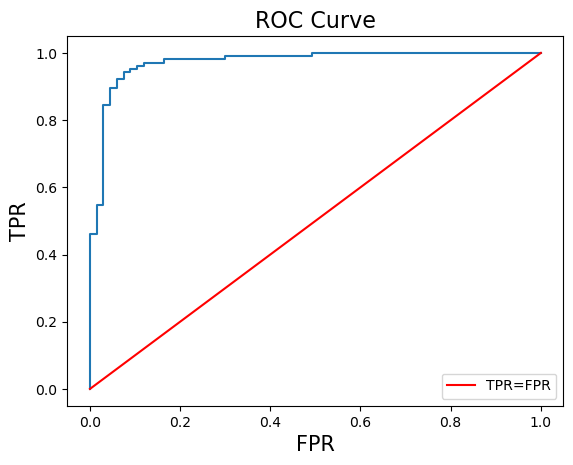

In [99]:
ypred_proba_gnb = gnb.predict_proba(x_test)

fpr_gnb,tpr_gnb,thresh_gnb = plot_roc_auc(gnb,y_test,ypred_proba_gnb)

In [100]:
update_score_card(model_name = 'Naive Bayes Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [101]:
# KNN Classifier


Training Score is: 90.95 %
Testing Score is: 90.06 %

Accuracy_Score is 0.9006
precision Score is: 0.9223
Recall Score is: 0.9135
kappa Score is: 0.792
F1 Score is: 0.9179

Confusion Matrix is
 [[59  8]
 [ 9 95]]

Predictions:
 [0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        67
           1       0.92      0.91      0.92       104

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.90       171
weighted avg       0.90      0.90      0.90       171



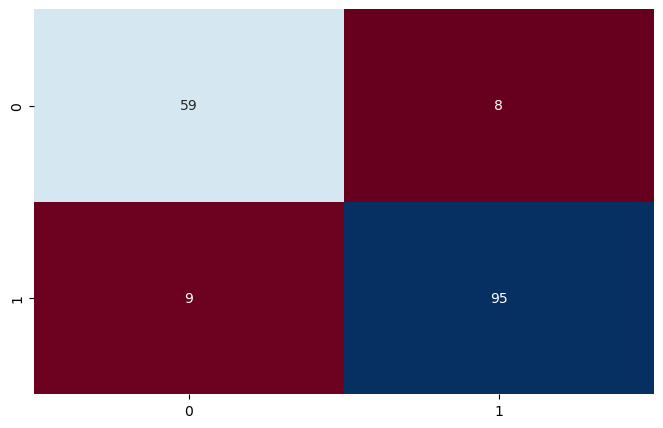

In [102]:
knn1 = KNeighborsClassifier(n_neighbors=9)
eval_model(knn1,x_train,x_test,y_train,y_test)

AUC: 0.9511337543053962


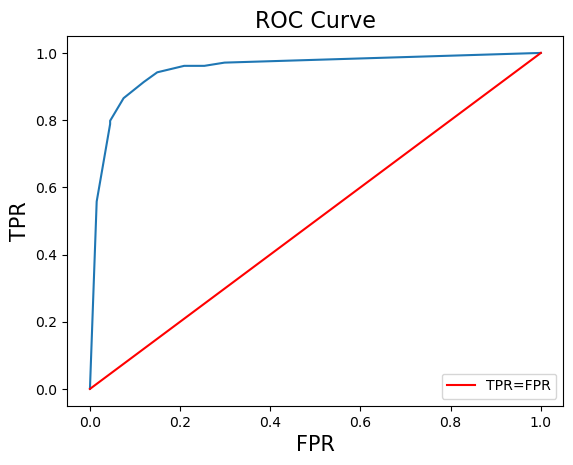

In [103]:
ypred_proba_knn1 = knn1.predict_proba(x_test)

fpr_knn1,tpr_knn1,thresh_knn1 = plot_roc_auc(knn1,y_test,ypred_proba_knn1)

In [104]:
update_score_card(model_name = 'KNN')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [105]:
# To find optimal number of neighbors for KNN

In [106]:
neighbors = list(range(3,51,2))
knn_acc = []
for i in neighbors:
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    knn_acc.append(accuracy_score(y_test,ypred))

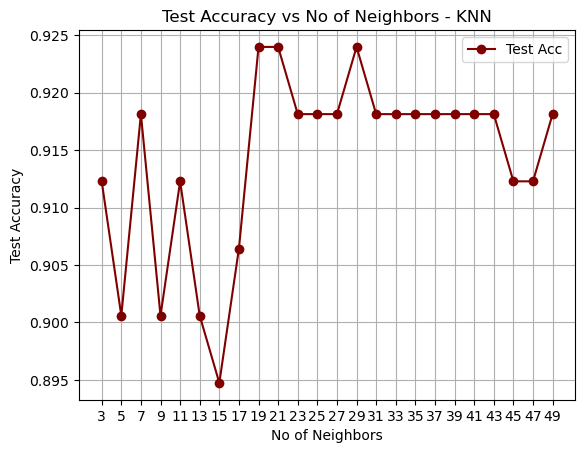

In [107]:
plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
plt.title('Test Accuracy vs No of Neighbors - KNN')
plt.xlabel('No of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()


Training Score is: 90.45 %
Testing Score is: 90.64 %

Accuracy_Score is 0.9064
precision Score is: 0.9231
Recall Score is: 0.9231
kappa Score is: 0.8037
F1 Score is: 0.9231

Confusion Matrix is
 [[59  8]
 [ 8 96]]

Predictions:
 [0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        67
           1       0.92      0.92      0.92       104

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



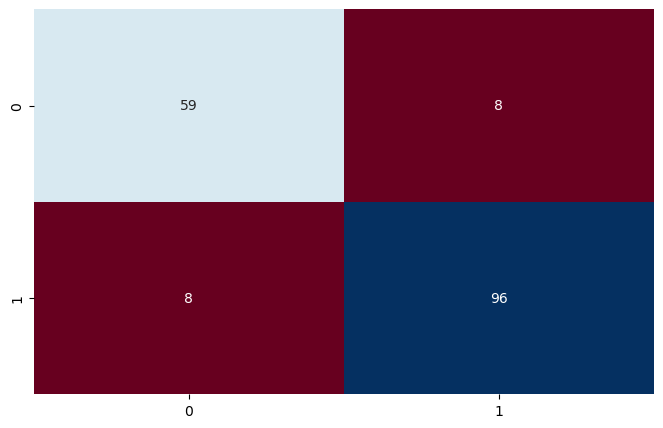

In [108]:
knn2 = KNeighborsClassifier(n_neighbors=17)
eval_model(knn2,x_train,x_test,y_train,y_test)

AUC: 0.9654133180252583


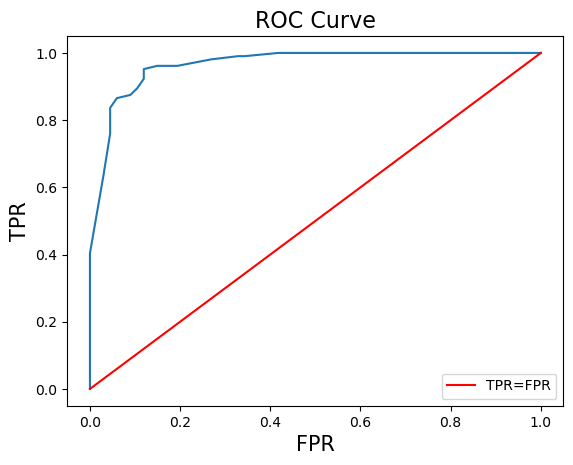

In [109]:
ypred_proba_knn2 = knn2.predict_proba(x_test)

fpr_knn2,tpr_knn2,thresh_knn2 = plot_roc_auc(knn2,y_test,ypred_proba_knn2)

In [110]:
update_score_card(model_name = 'KNN with tuned parameters')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [111]:
# Support Vector Classifier

In [112]:
# SVM using linear kernel


Training Score is: 95.48 %
Testing Score is: 94.74000000000001 %

Accuracy_Score is 0.9474
precision Score is: 0.9612
Recall Score is: 0.9519
kappa Score is: 0.8899
F1 Score is: 0.9565

Confusion Matrix is
 [[63  4]
 [ 5 99]]

Predictions:
 [0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.96      0.95      0.96       104

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



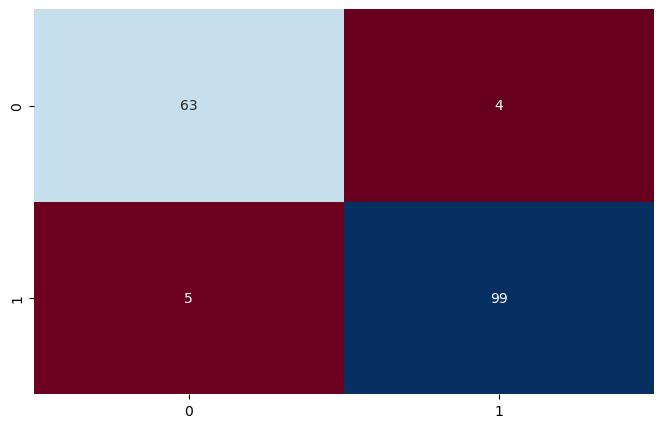

In [113]:
sv1= SVC(kernel='linear')
eval_model(sv1,x_train,x_test,y_train,y_test)

In [114]:
update_score_card(model_name = 'Support Vector using Linear kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [115]:
# SVM using Gaussian kernel


Training Score is: 88.44 %
Testing Score is: 90.06 %

Accuracy_Score is 0.9006
precision Score is: 0.8991
Recall Score is: 0.9423
kappa Score is: 0.7886
F1 Score is: 0.9202

Confusion Matrix is
 [[56 11]
 [ 6 98]]

Predictions:
 [0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        67
           1       0.90      0.94      0.92       104

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



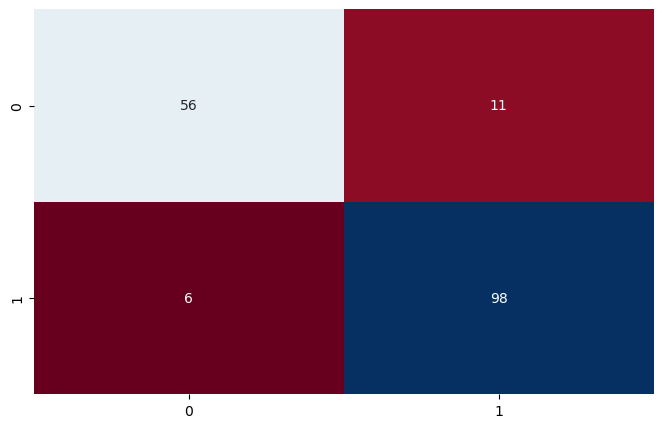

In [116]:
sv_gaussian= SVC(kernel='rbf')
eval_model(sv_gaussian,x_train,x_test,y_train,y_test)

In [117]:
update_score_card(model_name = 'Support Vector using Gaussian kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [118]:
# SVM using Sigmoid kernel


Training Score is: 54.769999999999996 %
Testing Score is: 50.88 %

Accuracy_Score is 0.5088
precision Score is: 0.5649
Recall Score is: 0.8365
kappa Score is: -0.1885
F1 Score is: 0.6744

Confusion Matrix is
 [[ 0 67]
 [17 87]]

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.56      0.84      0.67       104

    accuracy                           0.51       171
   macro avg       0.28      0.42      0.34       171
weighted avg       0.34      0.51      0.41       171



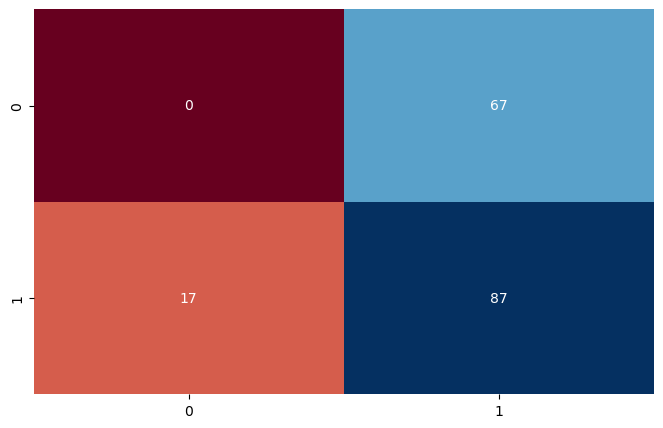

In [119]:
sv_sigmoid= SVC(kernel='sigmoid')
eval_model(sv_sigmoid,x_train,x_test,y_train,y_test)

In [120]:
update_score_card(model_name = 'Support Vector using Sigmoid kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [121]:
# SVM using Polynomial kernel


Training Score is: 89.95 %
Testing Score is: 91.23 %

Accuracy_Score is 0.9123
precision Score is: 0.9159
Recall Score is: 0.9423
kappa Score is: 0.8145
F1 Score is: 0.9289

Confusion Matrix is
 [[58  9]
 [ 6 98]]

Predictions:
 [0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        67
           1       0.92      0.94      0.93       104

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



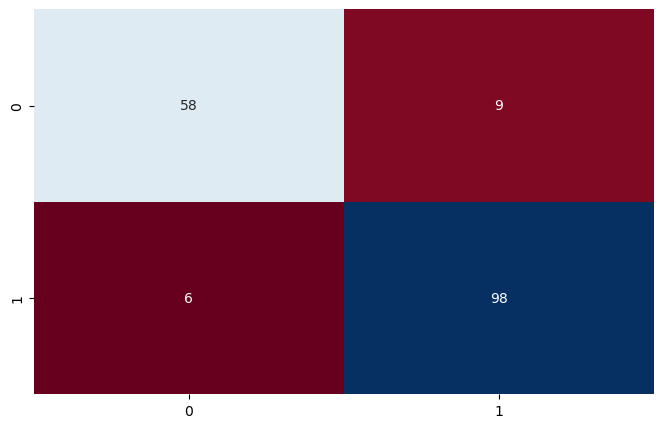

In [122]:
sv_poly= SVC(kernel='poly')
eval_model(sv_poly,x_train,x_test,y_train,y_test)

In [123]:
update_score_card(model_name = 'Support Vector using Polynomial kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [124]:
# SVM using Polynomial kernel and degree of polynomial 2


Training Score is: 96.23 %
Testing Score is: 95.32000000000001 %

Accuracy_Score is 0.9532
precision Score is: 0.9615
Recall Score is: 0.9615
kappa Score is: 0.9018
F1 Score is: 0.9615

Confusion Matrix is
 [[ 63   4]
 [  4 100]]

Predictions:
 [0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.96      0.96      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



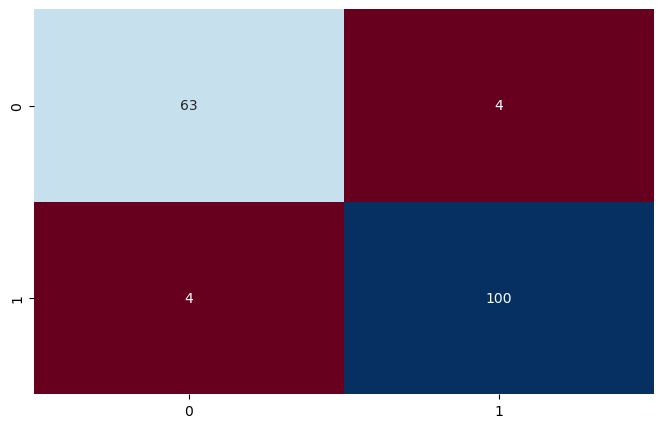

In [125]:
sv_poly2= SVC(kernel='poly', degree = 2, gamma = 'auto')
eval_model(sv_poly2,x_train,x_test,y_train,y_test)

In [126]:
update_score_card(model_name = 'Support Vector using Polynomial kernel with degree 2')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [127]:
# SVM using Polynomial kernel  using GridSearchCV

In [128]:
tuned_paramaters = [{ 'degree': [2, 4], 'gamma' : ['auto','scale' ], 'C': [0.5, 1] }]

svm_CV= SVC(random_state = 10)

grid = GridSearchCV(estimator=svm_CV , param_grid=tuned_paramaters, scoring='accuracy', cv= 5)

svm_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', svm_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'C': 1, 'degree': 2, 'gamma': 'auto'} 




Training Score is: 89.2 %
Testing Score is: 90.64 %

Accuracy_Score is 0.9064
precision Score is: 0.9074
Recall Score is: 0.9423
kappa Score is: 0.8016
F1 Score is: 0.9245

Confusion Matrix is
 [[57 10]
 [ 6 98]]

Predictions:
 [0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        67
           1       0.91      0.94      0.92       104

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



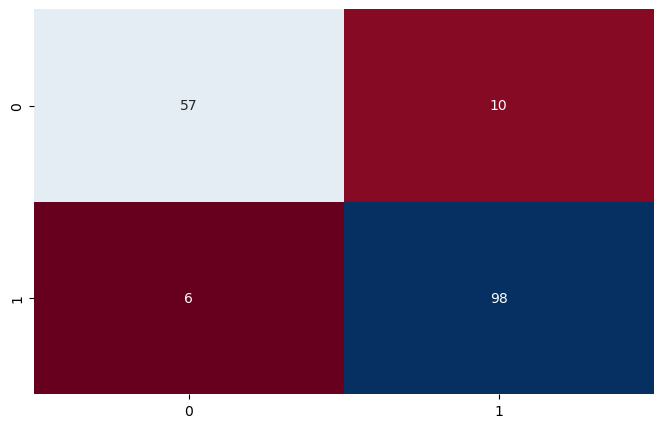

In [129]:
sv_poly_cv= SVC(kernel='poly', C=1, degree=2, gamma='scale')
eval_model(sv_poly_cv,x_train,x_test,y_train,y_test)

In [130]:
update_score_card(model_name = 'Support Vector Polynomial with Grid search CV')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308


In [131]:
# Model Comparision

In [132]:
score_card

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.937186,0.923977,0.982204,0.950495,0.923077,0.923977,0.841746,0.936585
1,Logistic Regression using SGD,0.886935,0.836257,0.982204,0.987179,0.740385,0.836257,0.678615,0.846154
2,Decision Tree Classifier,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
3,Decision Tree with Pruning,0.992462,0.900585,0.910161,0.948454,0.884615,0.900585,0.795210,0.915423
4,Bagging Ensemble,0.992462,0.929825,0.972302,0.979167,0.903846,0.929825,0.855818,0.940000
5,Adaboost Ensemble,1.000000,0.906433,0.915112,0.968085,0.875000,0.906433,0.808752,0.919192
6,XG Boost Ensemble,0.987437,0.918129,0.962830,0.968750,0.894231,0.918129,0.831788,0.930000
7,Random Forest,1.000000,0.935673,0.984501,0.969697,0.923077,0.935673,0.866794,0.945813
8,Random Forest with Pruning,0.982412,0.947368,0.987227,0.970297,0.942308,0.947368,0.890439,0.956098
9,Naive Bayes Classifier,0.902010,0.929825,0.972302,0.942308,0.942308,0.929825,0.852755,0.942308
